##📈 ***Predicting Agricultural Land Prices in Tunisia***

This notebook presents a complete machine learning workflow to **predict land prices** using real-world agricultural and environmental data from Tunisia.

📌 Key Components:
- **Exploratory Data Analysis (EDA)**: Understand feature distributions, relationships, and key drivers of land price
- **Data Preprocessing**: Handle missing values, treat outliers, normalize skewed distributions, and encode categorical variables
- **Feature Engineering**: Create new variables based on soil properties and land characteristics
- **Modeling & Tuning**: Train and compare Linear Regression, Random Forest, and XGBoost with hyperparameter optimization
- **Evaluation**: Use R², RMSE, and MAE to assess model performance and extract insights from feature importance

🚜 **Goal**: Deliver accurate and interpretable predictions of **agricultural land value** based on soil properties, environmental factors, and location-specific data in Tunisia.


# 🧠 **Data Understanding**

In [1]:
import pandas as pd

file_path = "/content/sample_data/data.xlsx"
# Charger le fichier Excel
df = pd.read_excel(file_path)

# Vérifier les premières lignes du fichier pour confirmer que tout s'est bien chargé
print(df.head())


    State         Catégorie                                  Emplacement  \
0  Ariana        habitation  El Menzah. Rue Hassen Ibn Thabet - Menzah 7   
1  Ariana        habitation  Jardins d'El Menzah - Jardins D'El Menzah 1   
2  Ariana        habitation                         El Menzah - Menzah 5   
3  Ariana        habitation  Jardins d'El Menzah - Jardins D'El Menzah 2   
4  Ariana  terrain agricole                                       Mnihla   

      Prix     Surface LNDF CLAF Drain   D1_PHAQ   D2_PHAQ  ...    D1_TAWC  \
0  1350000  809.678546   SH  CMc     M  9.312074  8.678004  ...  15.427912   
1   280000  357.651618   SH  SCn     P  7.953679  7.333852  ...  10.522304   
2  1350000  986.206321   SH  CMc     M  8.400223  9.663919  ...  17.154263   
3   430000  201.528068   SH  VRe   NaN  7.524204  7.952074  ...  12.011324   
4   439500  270.281773   SH  VRe   NaN  8.060220  7.940278  ...  14.308248   

     D2_TAWC    D3_TAWC    D4_TAWC    D5_TAWC D1_ELCO D2_ELCO D3_ELCO  \
0

In [2]:
df

,State,Catégorie,Emplacement,Prix,Surface,LNDF,CLAF,Drain,D1_PHAQ,D2_PHAQ,...,D1_TAWC,D2_TAWC,D3_TAWC,D4_TAWC,D5_TAWC,D1_ELCO,D2_ELCO,D3_ELCO,D4_ELCO,D5_ELCO
0,Ariana,habitation,El Menzah. Rue Hassen Ibn Thabet - Menzah 7,1350000,809.678546,SH,CMc,M,9.312074,8.678004,...,15.427912,14.196503,16.427454,15.692682,22.271477,11.60,5.28,11.68,8.63,7.90
1,Ariana,habitation,Jardins d'El Menzah - Jardins D'El Menzah 1,280000,357.651618,SH,SCn,P,7.953679,7.333852,...,10.522304,13.345472,10.818634,17.134257,11.330919,8.10,11.48,5.98,8.70,9.42
2,Ariana,habitation,El Menzah - Menzah 5,1350000,986.206321,SH,CMc,M,8.400223,9.663919,...,17.154263,14.129890,17.955734,15.629174,21.320532,11.86,5.89,7.40,6.52,11.47
3,Ariana,habitation,Jardins d'El Menzah - Jardins D'El Menzah 2,430000,201.528068,SH,VRe,NaN,7.524204,7.952074,...,12.011324,8.909737,16.239101,14.256338,15.094084,10.42,6.22,9.57,5.59,6.12
4,Ariana,terrain agricole,Mnihla,439500,270.281773,SH,VRe,NaN,8.060220,7.940278,...,14.308248,12.830088,14.204495,17.106036,12.853853,11.46,6.42,5.10,9.77,6.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Tunis,habitation,Gammarth,368900,497.331130,LP,PZh,NaN,7.679694,7.417382,...,10.056949,13.435688,14.761131,14.025948,17.690569,10.31,10.79,7.47,9.68,12.39
424,Tunis,habitation,Les Berges Du Lac - Les Berges Du Lac 1,2900000,1295.118567,LP,CMc,M,9.050224,9.631221,...,22.094404,19.630515,25.140758,20.994976,27.256844,9.40,8.03,7.57,8.49,11.56
425,Tunis,habitation,Mutuelleville - CitÃ© Des Jardins,930000,487.988818,LP,CMc,M,9.245091,8.424381,...,8.879974,14.410891,14.689790,16.204815,22.615028,9.84,8.49,8.48,7.88,10.28
426,Tunis,habitation,Le Bardo. Rue de major Lazhar kthiri - Bardo,692500,507.874729,LP,LXh,NaN,7.760756,8.724375,...,12.247854,17.947192,14.273741,12.100888,15.066471,10.22,9.09,11.46,11.90,10.53


In [3]:
print(df["Catégorie"].value_counts())

Catégorie
habitation          315
terrain agricole    113
Name: count, dtype: int64


In [4]:
df.shape

(428, 28)

In [5]:
df.head(6)

,State,Catégorie,Emplacement,Prix,Surface,LNDF,CLAF,Drain,D1_PHAQ,D2_PHAQ,...,D1_TAWC,D2_TAWC,D3_TAWC,D4_TAWC,D5_TAWC,D1_ELCO,D2_ELCO,D3_ELCO,D4_ELCO,D5_ELCO
0,Ariana,habitation,El Menzah. Rue Hassen Ibn Thabet - Menzah 7,1350000,809.678546,SH,CMc,M,9.312074,8.678004,...,15.427912,14.196503,16.427454,15.692682,22.271477,11.60,5.28,11.68,8.63,7.90
1,Ariana,habitation,Jardins d'El Menzah - Jardins D'El Menzah 1,280000,357.651618,SH,SCn,P,7.953679,7.333852,...,10.522304,13.345472,10.818634,17.134257,11.330919,8.10,11.48,5.98,8.70,9.42
2,Ariana,habitation,El Menzah - Menzah 5,1350000,986.206321,SH,CMc,M,8.400223,9.663919,...,17.154263,14.129890,17.955734,15.629174,21.320532,11.86,5.89,7.40,6.52,11.47
3,Ariana,habitation,Jardins d'El Menzah - Jardins D'El Menzah 2,430000,201.528068,SH,VRe,NaN,7.524204,7.952074,...,12.011324,8.909737,16.239101,14.256338,15.094084,10.42,6.22,9.57,5.59,6.12
4,Ariana,terrain agricole,Mnihla,439500,270.281773,SH,VRe,NaN,8.060220,7.940278,...,14.308248,12.830088,14.204495,17.106036,12.853853,11.46,6.42,5.10,9.77,6.49
5,Ariana,habitation,Ariana. CitÃ© des professeurs - PÃ´le Technolo...,370900,276.955524,SH,SCg,P,7.872787,7.617756,...,11.474932,10.818303,14.749612,15.025835,15.845995,5.56,11.22,6.35,10.42,9.40


In [6]:
df.tail(6)

,State,Catégorie,Emplacement,Prix,Surface,LNDF,CLAF,Drain,D1_PHAQ,D2_PHAQ,...,D1_TAWC,D2_TAWC,D3_TAWC,D4_TAWC,D5_TAWC,D1_ELCO,D2_ELCO,D3_ELCO,D4_ELCO,D5_ELCO
422,Tunis,habitation,Manar - Manar 1,470000,812.254742,LP,VRe,NaN,8.500589,8.347537,...,13.812858,14.061900,15.078611,19.418493,14.244344,12.61,12.13,11.76,11.30,9.98
423,Tunis,habitation,Gammarth,368900,497.331130,LP,PZh,NaN,7.679694,7.417382,...,10.056949,13.435688,14.761131,14.025948,17.690569,10.31,10.79,7.47,9.68,12.39
424,Tunis,habitation,Les Berges Du Lac - Les Berges Du Lac 1,2900000,1295.118567,LP,CMc,M,9.050224,9.631221,...,22.094404,19.630515,25.140758,20.994976,27.256844,9.40,8.03,7.57,8.49,11.56
425,Tunis,habitation,Mutuelleville - CitÃ© Des Jardins,930000,487.988818,LP,CMc,M,9.245091,8.424381,...,8.879974,14.410891,14.689790,16.204815,22.615028,9.84,8.49,8.48,7.88,10.28
426,Tunis,habitation,Le Bardo. Rue de major Lazhar kthiri - Bardo,692500,507.874729,LP,LXh,NaN,7.760756,8.724375,...,12.247854,17.947192,14.273741,12.100888,15.066471,10.22,9.09,11.46,11.90,10.53
427,Zaghouan,terrain agricole,Zaghouan,58000,164.029642,TH,LPe,W,7.639067,7.915705,...,9.391347,10.721626,13.118196,10.697035,11.665525,13.59,12.01,9.76,7.77,7.18


In [7]:
# Statistiques pour les colonnes numériques
df.describe()

,Prix,Surface,D1_PHAQ,D2_PHAQ,D3_PHAQ,D4_PHAQ,D5_PHAQ,D1_TAWC,D2_TAWC,D3_TAWC,D4_TAWC,D5_TAWC,D1_ELCO,D2_ELCO,D3_ELCO,D4_ELCO,D5_ELCO
count,4.280000e+02,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,423.000000,423.000000,423.000000,423.000000,423.000000
mean,3.590271e+05,415.617301,7.749367,7.748986,7.868077,7.878598,7.923571,11.880980,12.090696,12.589049,12.942045,14.254714,9.180709,9.153381,9.132884,9.067683,9.051135
std,3.737321e+05,189.026829,0.567812,0.570165,0.614056,0.596154,0.585335,2.981848,2.893816,2.890201,3.158609,3.935729,2.428019,2.248789,2.365910,2.277425,2.182125
min,3.800000e+04,50.000000,6.326477,6.331995,6.245676,6.370469,6.305611,4.386237,4.765219,5.482243,2.551493,3.457350,5.060000,5.260000,5.000000,5.100000,5.010000
25%,1.550000e+05,282.805096,7.377374,7.375000,7.460747,7.505322,7.537110,9.941293,10.026064,10.670233,10.893067,11.755705,7.290000,7.370000,7.290000,7.410000,7.365000
50%,2.654000e+05,408.732598,7.714868,7.736601,7.842515,7.848345,7.873218,11.558484,11.927109,12.540095,12.779005,14.189752,8.940000,9.110000,9.050000,8.870000,8.900000
75%,4.375000e+05,510.844425,8.054449,8.045480,8.186479,8.222541,8.296842,13.447330,13.869768,14.298001,14.761896,16.491632,10.600000,10.535000,10.450000,10.335000,10.465000
max,4.000000e+06,1423.861832,11.324334,10.840501,11.847161,12.096280,11.131688,31.599003,26.452957,31.364820,31.394802,31.158415,17.360000,19.020000,19.390000,16.940000,17.850000


In [8]:
# Statistiques pour les colonnes catégoriques
df.describe(include=['object'])

,State,Catégorie,Emplacement,LNDF,CLAF,Drain,D1_PSCL,D2_PSCL,D3_PSCL,D4_PSCL,D5_PSCL
count,428,428,428,428,428,382,382,382,337,300,294
unique,14,2,193,7,27,6,4,4,4,4,4
top,Nabeul,habitation,Hammamet,LP,GYp,W,M,M,M,M,M
freq,127,315,31,323,73,158,226,216,131,133,134


In [9]:
# Vérifier s'il y a des NaN dans le DataFrame
nan_count = df.isna().sum()

# Afficher le nombre de NaN par colonne
print("Nombre de NaN par colonne :")
print(nan_count)

# Vérifier s'il y a des lignes contenant des NaN
rows_with_nan = df[df.isna().any(axis=1)]

# Afficher les lignes avec des NaN, si elles existent
if not rows_with_nan.empty:
    print("\nLignes avec NaN :")
    print(rows_with_nan)
else:
    print("\nIl n'y a pas de lignes avec des NaN.")

Nombre de NaN par colonne :
State            0
Catégorie        0
Emplacement      0
Prix             0
Surface          0
LNDF             0
CLAF             0
Drain           46
D1_PHAQ          0
D2_PHAQ          0
D3_PHAQ          0
D4_PHAQ          0
D5_PHAQ          0
D1_PSCL         46
D2_PSCL         46
D3_PSCL         91
D4_PSCL        128
D5_PSCL        134
D1_TAWC          0
D2_TAWC          0
D3_TAWC          0
D4_TAWC          0
D5_TAWC          0
D1_ELCO          5
D2_ELCO          5
D3_ELCO          5
D4_ELCO          5
D5_ELCO          5
dtype: int64

Lignes avec NaN :
        State         Catégorie                                   Emplacement  \
3      Ariana        habitation   Jardins d'El Menzah - Jardins D'El Menzah 2   
4      Ariana  terrain agricole                                        Mnihla   
8      Ariana        habitation                       La Soukra - Borj Louzir   
12     Ariana        habitation                          La Soukra - Chotrana   
13 

In [10]:
print("\nNumber of duplicates:", df.duplicated().sum())
print("\nUnique values:")
print(df.nunique())


Number of duplicates: 0

Unique values:
State           14
Catégorie        2
Emplacement    193
Prix           254
Surface        425
LNDF             7
CLAF            27
Drain            6
D1_PHAQ        428
D2_PHAQ        428
D3_PHAQ        428
D4_PHAQ        428
D5_PHAQ        428
D1_PSCL          4
D2_PSCL          4
D3_PSCL          4
D4_PSCL          4
D5_PSCL          4
D1_TAWC        428
D2_TAWC        428
D3_TAWC        428
D4_TAWC        428
D5_TAWC        428
D1_ELCO        341
D2_ELCO        331
D3_ELCO        323
D4_ELCO        313
D5_ELCO        331
dtype: int64


In [11]:
print(df["LNDF"].unique())


['SH' 'LP' 'LV' 'SP' 'LF' 'TH' 'LD']


In [12]:
print(df["Drain"].unique())


['M' 'P' nan 'W' 'I' 'S' 'E']


In [13]:
print(df["D1_PSCL"].unique())


['F' 'M' nan 'V' 'C']


In [14]:
print(df["D2_PSCL"].unique())


['F' 'M' nan 'V' 'C']


In [15]:
#categorial columns and numerical colunmns

categorical_columns = df.select_dtypes(include=['object','bool']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Categorical columns:", categorical_columns)
print("\nNumerical columns:", numerical_columns)

Categorical columns: Index(['State', 'Catégorie', 'Emplacement', 'LNDF', 'CLAF', 'Drain', 'D1_PSCL',
       'D2_PSCL', 'D3_PSCL', 'D4_PSCL', 'D5_PSCL'],
      dtype='object')

Numerical columns: Index(['Prix', 'Surface', 'D1_PHAQ', 'D2_PHAQ', 'D3_PHAQ', 'D4_PHAQ',
       'D5_PHAQ', 'D1_TAWC', 'D2_TAWC', 'D3_TAWC', 'D4_TAWC', 'D5_TAWC',
       'D1_ELCO', 'D2_ELCO', 'D3_ELCO', 'D4_ELCO', 'D5_ELCO'],
      dtype='object')


In [16]:
# Vérifier les types de données et la présence de valeurs manquantes
df.info()

# Vérifier les valeurs uniques dans chaque colonne pour détecter d'éventuels problèmes
df.nunique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   State        428 non-null    object 
 1   Catégorie    428 non-null    object 
 2   Emplacement  428 non-null    object 
 3   Prix         428 non-null    int64  
 4   Surface      428 non-null    float64
 5   LNDF         428 non-null    object 
 6   CLAF         428 non-null    object 
 7   Drain        382 non-null    object 
 8   D1_PHAQ      428 non-null    float64
 9   D2_PHAQ      428 non-null    float64
 10  D3_PHAQ      428 non-null    float64
 11  D4_PHAQ      428 non-null    float64
 12  D5_PHAQ      428 non-null    float64
 13  D1_PSCL      382 non-null    object 
 14  D2_PSCL      382 non-null    object 
 15  D3_PSCL      337 non-null    object 
 16  D4_PSCL      300 non-null    object 
 17  D5_PSCL      294 non-null    object 
 18  D1_TAWC      428 non-null    float64
 19  D2_TAWC 

,0
State,14
Catégorie,2
Emplacement,193
Prix,254
Surface,425
LNDF,7
CLAF,27
Drain,6
D1_PHAQ,428
D2_PHAQ,428


In [17]:
# Identifier les valeurs problématiques dans la colonne Prix
invalid_prices = df[~df["Prix"].astype(str).str.replace(" DT", "", regex=False).str.replace(" ", "").str.replace(".", "").str.isnumeric()]["Prix"]

# Afficher les valeurs uniques non numériques
invalid_prices.unique()


array([], dtype=int64)

In [18]:
print(df["Catégorie"].value_counts())


Catégorie
habitation          315
terrain agricole    113
Name: count, dtype: int64


In [19]:
df.columns

Index(['State', 'Catégorie', 'Emplacement', 'Prix', 'Surface', 'LNDF', 'CLAF',
       'Drain', 'D1_PHAQ', 'D2_PHAQ', 'D3_PHAQ', 'D4_PHAQ', 'D5_PHAQ',
       'D1_PSCL', 'D2_PSCL', 'D3_PSCL', 'D4_PSCL', 'D5_PSCL', 'D1_TAWC',
       'D2_TAWC', 'D3_TAWC', 'D4_TAWC', 'D5_TAWC', 'D1_ELCO', 'D2_ELCO',
       'D3_ELCO', 'D4_ELCO', 'D5_ELCO'],
      dtype='object')

In [20]:
#categorial columns and numerical colunmns

categorical_columns = df.select_dtypes(include=['object','bool']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Categorical columns:", categorical_columns)
print("\nNumerical columns:", numerical_columns)

Categorical columns: Index(['State', 'Catégorie', 'Emplacement', 'LNDF', 'CLAF', 'Drain', 'D1_PSCL',
       'D2_PSCL', 'D3_PSCL', 'D4_PSCL', 'D5_PSCL'],
      dtype='object')

Numerical columns: Index(['Prix', 'Surface', 'D1_PHAQ', 'D2_PHAQ', 'D3_PHAQ', 'D4_PHAQ',
       'D5_PHAQ', 'D1_TAWC', 'D2_TAWC', 'D3_TAWC', 'D4_TAWC', 'D5_TAWC',
       'D1_ELCO', 'D2_ELCO', 'D3_ELCO', 'D4_ELCO', 'D5_ELCO'],
      dtype='object')


# 📊 **Data Visualization**


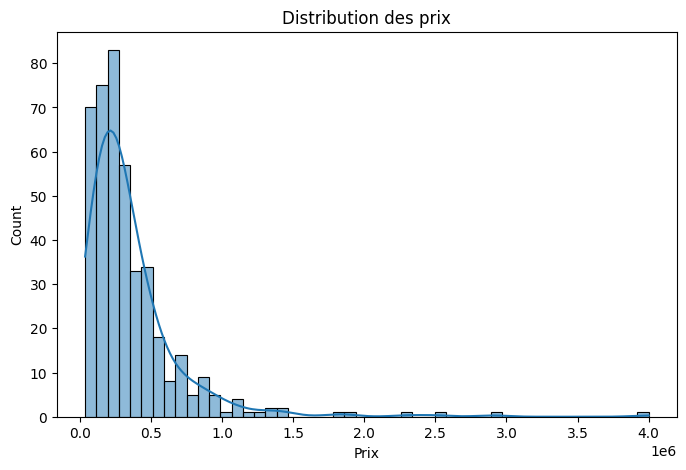

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution du prix
plt.figure(figsize=(8,5))
sns.histplot(df["Prix"], bins=50, kde=True)
plt.title("Distribution des prix")
plt.show()


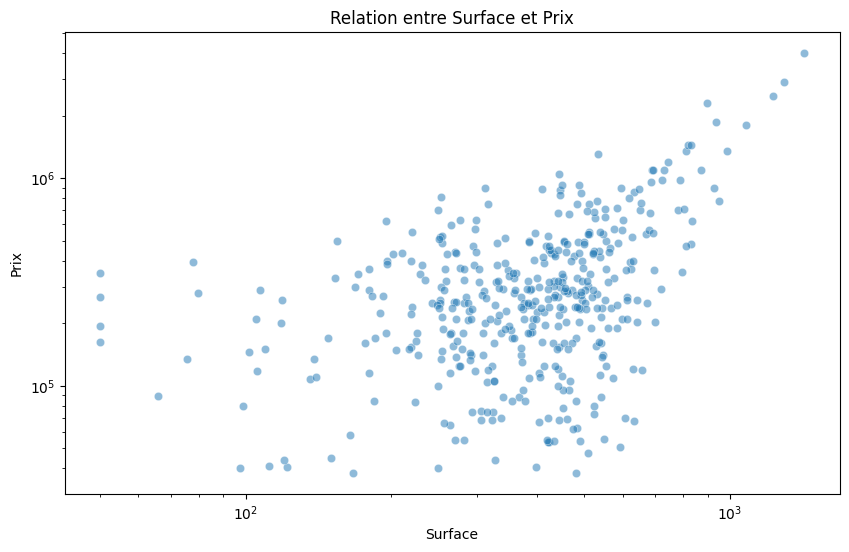

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))  # Augmenter la taille de la figure
sns.scatterplot(x=df["Surface"], y=df["Prix"], alpha=0.5)  # Ajouter de la transparence
plt.xscale("log")  # Échelle logarithmique si la distribution est très asymétrique
plt.yscale("log")  # Échelle logarithmique si nécessaire
plt.xlabel("Surface")
plt.ylabel("Prix")
plt.title("Relation entre Surface et Prix")

plt.show()


Plus la surface est grande, plus le prix a tendance à être élevé, mais la relation n'est pas strictement linéaire.

Les petites surfaces (1 à 100 m²) ont des prix très variables, reflétant l'importance de la localisation.

Les grandes surfaces (10 000 à 1 000 000 m²) ont des prix généralement plus élevés, mais avec une forte dispersion due à d'autres facteurs comme le type de sol ou la région.

Des outliers (points éloignés) montrent des exceptions, comme des terrains très chers malgré une petite surface, ou des terrains très grands à prix modéré.
=> la surface influence le prix, mais d'autres facteurs jouent un rôle clé.

Index(['State', 'Catégorie', 'Emplacement', 'Prix', 'Surface', 'LNDF', 'CLAF',
       'Drain', 'D1_PHAQ', 'D2_PHAQ', 'D3_PHAQ', 'D4_PHAQ', 'D5_PHAQ',
       'D1_PSCL', 'D2_PSCL', 'D3_PSCL', 'D4_PSCL', 'D5_PSCL', 'D1_TAWC',
       'D2_TAWC', 'D3_TAWC', 'D4_TAWC', 'D5_TAWC', 'D1_ELCO', 'D2_ELCO',
       'D3_ELCO', 'D4_ELCO', 'D5_ELCO'],
      dtype='object')


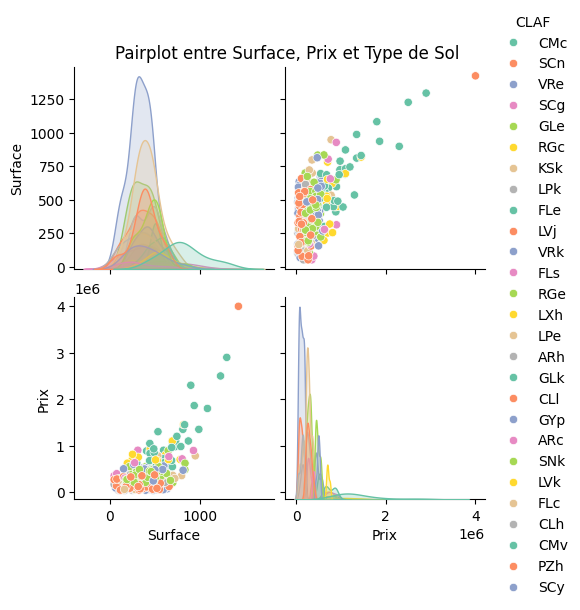

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Vérification des colonnes
print(df.columns)
df.columns = df.columns.str.strip()  # Enlever les espaces invisibles




# Visualisation 4: Pairplot pour voir toutes les relations entre les variables numériques
sns.pairplot(df[['Surface', 'Prix', 'CLAF']], hue='CLAF', palette='Set2')
plt.suptitle('Pairplot entre Surface, Prix et Type de Sol', y=1.02)
plt.show()



1-Relation Surface-Prix :
Il y a une tendance positive : les terrains avec une plus grande surface ont généralement un prix plus élevé.
Cependant, la dispersion des points montre que d'autres facteurs, comme le type de sol (CLAF), influencent également le prix.

2-Impact du Type de Sol (CLAF) :
Certains types de sol (par exemple, SCg, FLe) semblent associés à des prix plus élevés, indépendamment de la surface.
D'autres types de sol (par exemple, CLp, ARh) montrent une grande variabilité de prix, même pour des surfaces similaires.

3-Outliers :
Certains points s'écartent de la tendance générale, indiquant des cas particuliers où des terrains de petite surface ont des prix très élevés (peut-être dus à la localisation ou à d'autres facteurs).

=>  la surface et le type de sol jouent un rôle important dans la détermination du prix, mais d'autres facteurs non visibles ici (comme la région) influencent également les résultats.

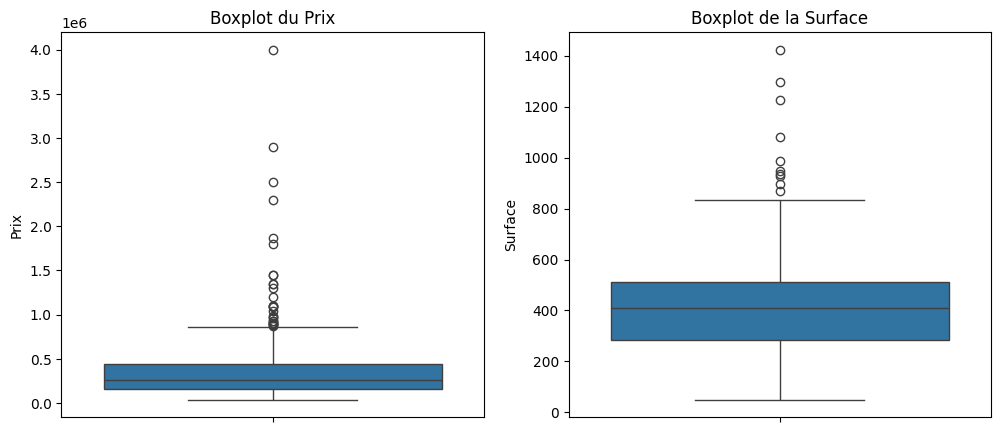

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tracer les boxplots pour voir les outliers
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Prix'])
plt.title("Boxplot du Prix")

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Surface'])
plt.title("Boxplot de la Surface")

plt.show()


1-Boxplot du Prix :
La médiane (ligne au milieu de la boîte) indique la valeur centrale des prix.
Les outliers (points au-dessus de la boîte) montrent des terrains avec des prix exceptionnellement élevés, bien au-delà de la majorité des données.
La dispersion des prix est importante, ce qui signifie que les terrains peuvent varier considérablement en termes de prix, même pour des surfaces similaires.

2-Boxplot de la Surface :
La médiane montre la surface typique des terrains.
Les outliers (points au-dessus de la boîte) indiquent des terrains avec des surfaces extrêmement grandes, bien au-delà de la norme.
La dispersion des surfaces est également importante, reflétant une grande variabilité dans la taille des terrains.

=> des valeurs extrêmes (outliers) à la fois pour le prix et la surface, ce qui suggère une grande variabilité dans les caractéristiques des terrains. Cela peut être dû à des facteurs comme la localisation, le type de sol ou d'autres caractéristiques non visibles ici.

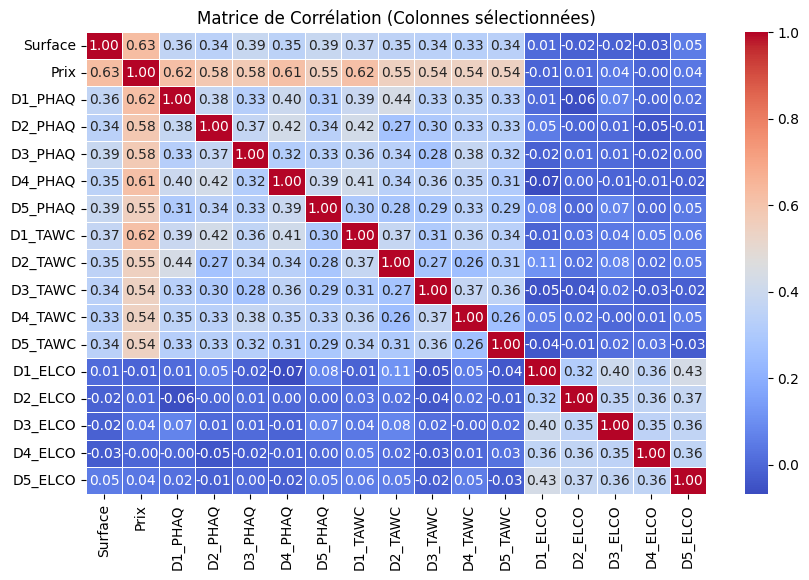

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


cols_of_interest = ['Surface','Prix','D1_PHAQ', 'D2_PHAQ', 'D3_PHAQ', 'D4_PHAQ', 'D5_PHAQ',
       'D1_TAWC', 'D2_TAWC', 'D3_TAWC', 'D4_TAWC', 'D5_TAWC', 'D1_ELCO',
       'D2_ELCO', 'D3_ELCO', 'D4_ELCO', 'D5_ELCO']

# Vérifier que ces colonnes existent bien dans le DataFrame
cols_of_interest = [col for col in cols_of_interest if col in df.columns]

# Calcul de la matrice de corrélation restreinte
corr_matrix = df[cols_of_interest].corr()

# Affichage de la heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Titre du graphique
plt.title('Matrice de Corrélation (Colonnes sélectionnées)')
plt.show()


In [26]:
# Affichage de la matrice de corrélation sous forme de tableau textuel
corr_matrix_rounded = corr_matrix.round(2)
print(corr_matrix_rounded)


         Surface  Prix  D1_PHAQ  D2_PHAQ  D3_PHAQ  D4_PHAQ  D5_PHAQ  D1_TAWC  \
Surface     1.00  0.63     0.36     0.34     0.39     0.35     0.39     0.37   
Prix        0.63  1.00     0.62     0.58     0.58     0.61     0.55     0.62   
D1_PHAQ     0.36  0.62     1.00     0.38     0.33     0.40     0.31     0.39   
D2_PHAQ     0.34  0.58     0.38     1.00     0.37     0.42     0.34     0.42   
D3_PHAQ     0.39  0.58     0.33     0.37     1.00     0.32     0.33     0.36   
D4_PHAQ     0.35  0.61     0.40     0.42     0.32     1.00     0.39     0.41   
D5_PHAQ     0.39  0.55     0.31     0.34     0.33     0.39     1.00     0.30   
D1_TAWC     0.37  0.62     0.39     0.42     0.36     0.41     0.30     1.00   
D2_TAWC     0.35  0.55     0.44     0.27     0.34     0.34     0.28     0.37   
D3_TAWC     0.34  0.54     0.33     0.30     0.28     0.36     0.29     0.31   
D4_TAWC     0.33  0.54     0.35     0.33     0.38     0.35     0.33     0.36   
D5_TAWC     0.34  0.54     0.33     0.33

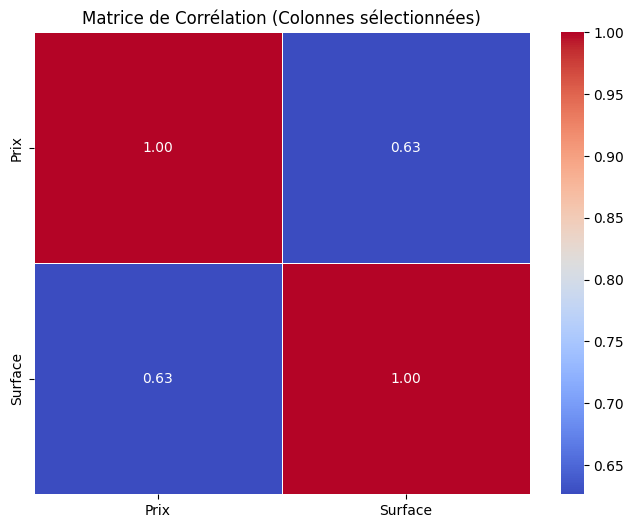

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Sélection des colonnes spécifiques pour la matrice de corrélation
cols_of_interest = [ 'Prix', 'Surface']

# Vérifier que ces colonnes existent bien dans le DataFrame
cols_of_interest = [col for col in cols_of_interest if col in df.columns]

# Calcul de la matrice de corrélation restreinte
corr_matrix = df[cols_of_interest].corr()

# Affichage de la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Titre du graphique
plt.title('Matrice de Corrélation (Colonnes sélectionnées)')
plt.show()



In [28]:
print(df.dtypes)


State           object
Catégorie       object
Emplacement     object
Prix             int64
Surface        float64
LNDF            object
CLAF            object
Drain           object
D1_PHAQ        float64
D2_PHAQ        float64
D3_PHAQ        float64
D4_PHAQ        float64
D5_PHAQ        float64
D1_PSCL         object
D2_PSCL         object
D3_PSCL         object
D4_PSCL         object
D5_PSCL         object
D1_TAWC        float64
D2_TAWC        float64
D3_TAWC        float64
D4_TAWC        float64
D5_TAWC        float64
D1_ELCO        float64
D2_ELCO        float64
D3_ELCO        float64
D4_ELCO        float64
D5_ELCO        float64
dtype: object


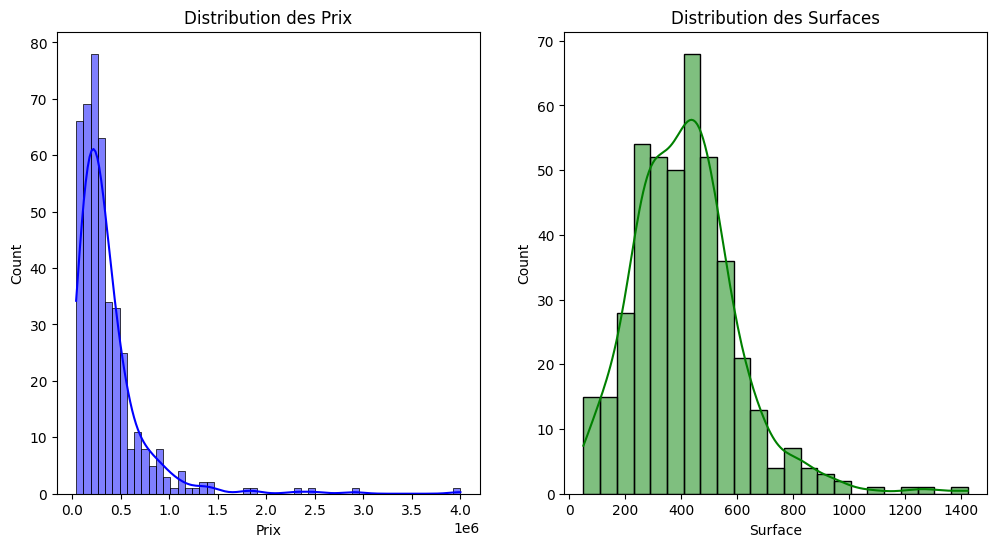

In [29]:
# Histogrammes pour 'Prix' et 'Surface'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Prix'], kde=True, color='blue')
plt.title('Distribution des Prix')

plt.subplot(1, 2, 2)
sns.histplot(df['Surface'], kde=True, color='green')
plt.title('Distribution des Surfaces')
plt.show()

1-Distribution des Prix :
La majorité des terrains ont des prix regroupés dans une plage spécifique (probablement entre 0.0 et 1.0 sur l'axe des x, en fonction de l'échelle).
Il y a quelques terrains avec des prix plus élevés (jusqu'à 3.0), mais ils sont moins fréquents.
Cela indique que les prix des terrains suivent une distribution asymétrique, avec une concentration dans les valeurs basses et quelques valeurs extrêmes.

2-Distribution des Surfaces :
La plupart des terrains ont des surfaces relativement petites (probablement entre 0.0 et 1.0 sur l'axe des x).
Il y a quelques terrains avec des surfaces très grandes (jusqu'à 2.5), mais ils sont rares.
Cela montre que les surfaces des terrains suivent également une distribution asymétrique, avec une concentration dans les petites surfaces et quelques valeurs extrêmes.

==> Ces histogrammes montrent que :
Les prix et les surfaces des terrains sont majoritairement regroupés dans des plages basses.
Il existe des valeurs extrêmes (outliers) pour les deux variables, ce qui indique une grande variabilité dans les données.
Ces distributions suggèrent que la majorité des terrains sont de petite taille et à prix modéré, avec quelques exceptions très chères ou très grandes.



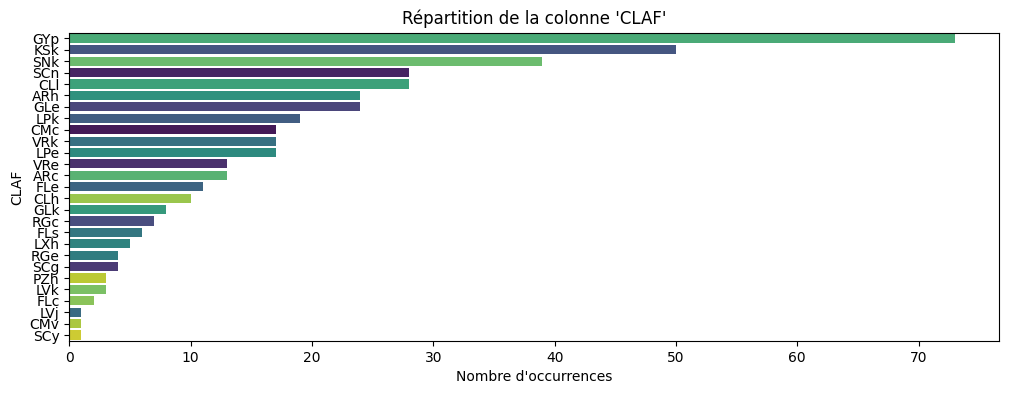

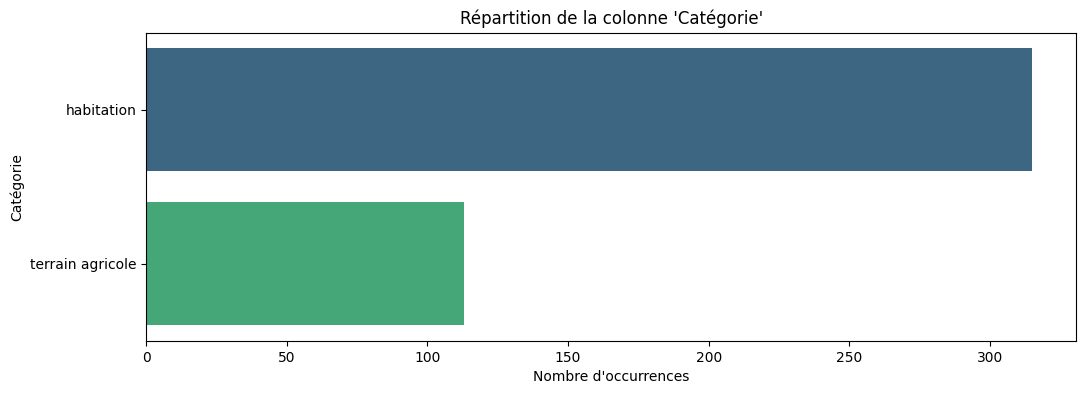

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sélectionner uniquement les colonnes "CLAF" et "Catégorie" si elles existent
categorical_cols = ["CLAF", "Catégorie"]
existing_cols = [col for col in categorical_cols if col in df.columns]

if existing_cols:
    for col in existing_cols:
        plt.figure(figsize=(12, 4))
        sns.countplot(y=df[col], order=df[col].value_counts().index, hue=df[col], legend=False, palette="viridis")

        # Ajouter des labels
        plt.xlabel("Nombre d'occurrences")
        plt.ylabel(col)
        plt.title(f"Répartition de la colonne '{col}'")

        plt.show()
else:
    print("⚠️ Les colonnes 'CLAF' et 'Catégorie' n'existent pas dans df.")


1. Répartition de la colonne 'CLAF' (Type de Sol) :
CLP est le type de sol le plus fréquent, avec environ 120 occurrences.
D'autres types de sol comme FLE, FLS, ARIA, VRE, etc., sont moins fréquents, avec des occurrences variant entre 20 et 80.
Certains types de sol comme GLK, GWV, AKE, LPE, etc., sont très rares, avec moins de 20 occurrences.
Cela montre que certains types de sol sont dominants (comme CLP), tandis que d'autres sont peu courants.

2. Répartition de la colonne 'Catégorie' :
La catégorie "terrain agricole" est la plus fréquente, avec environ 350 occurrences.
La catégorie "habitation" est également bien représentée, avec environ 200 occurrences.
Cela indique que les terrains agricoles sont plus nombreux dans le dataset que les terrains destinés à l'habitation.

*)Le type de sol CLP et la catégorie "terrain agricole" dominent le dataset.

*)Les autres types de sol et catégories sont moins fréquents, ce qui pourrait refléter des spécificités régionales ou des préférences du marché.

*)Ces répartitions peuvent influencer l'analyse des prix, car les terrains agricoles et les types de sol courants pourraient avoir des prix différents des autres catégories.

==>ces graphiques montrent une dominance claire de certains types de sol et catégories, avec une longue queue de valeurs moins fréquentes. Cela suggère que les données sont asymétriques et que certaines catégories sont sous-représentées.

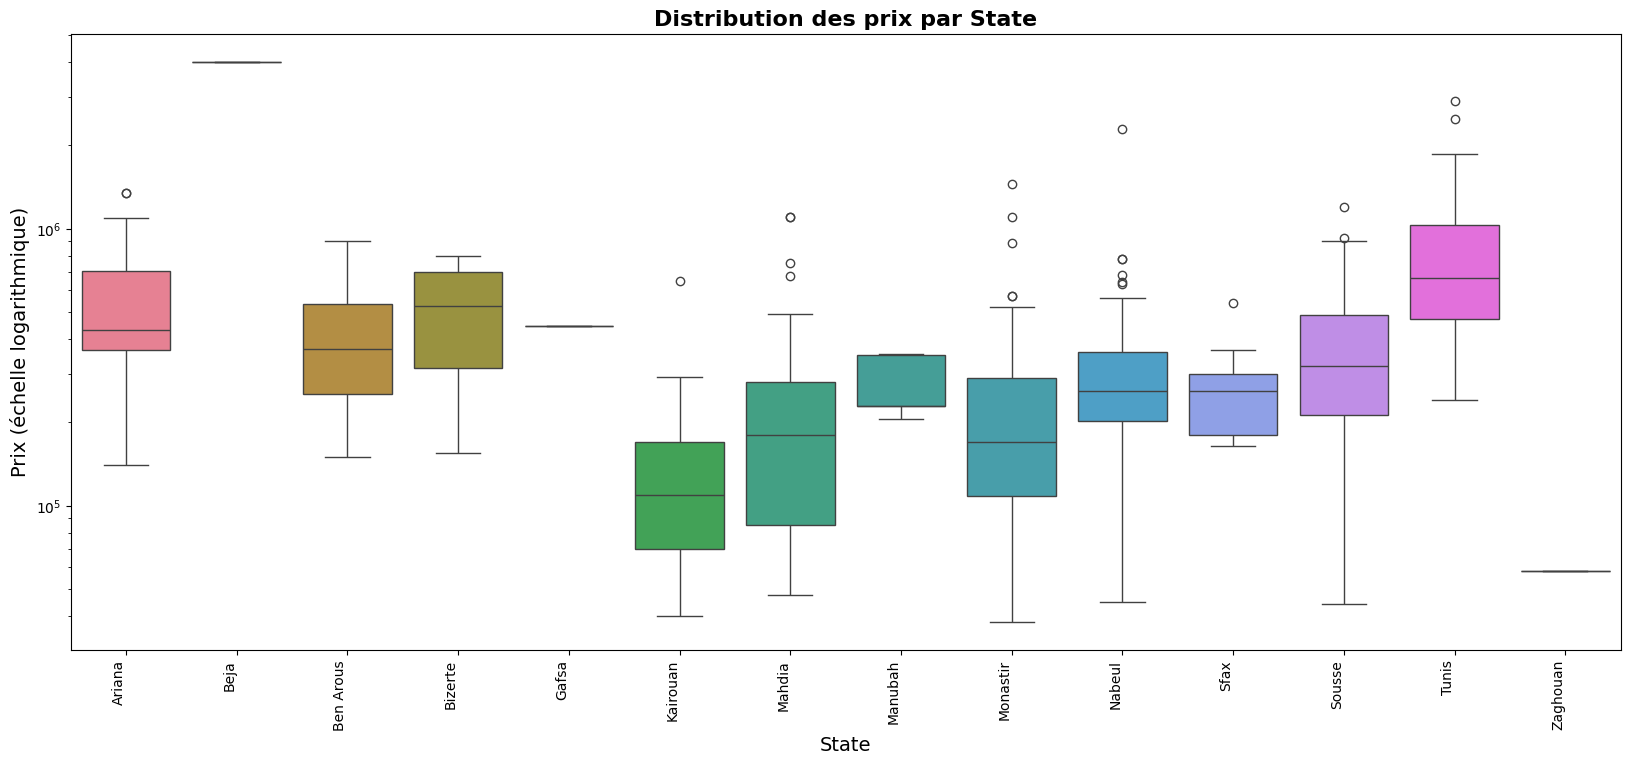

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajuster la taille de la figure
plt.figure(figsize=(20, 8))

# Tracer le boxplot correctement
sns.boxplot(x="State", y="Prix", data=df, hue="State", legend=False)

# Rotation des labels pour éviter le chevauchement
plt.xticks(rotation=90, ha="right")  # 'ha' = alignement horizontal

# Mettre une échelle logarithmique pour mieux voir les variations (optionnel)
plt.yscale("log")

# Ajouter un titre et des labels
plt.title("Distribution des prix par State", fontsize=16, fontweight="bold")
plt.xlabel("State", fontsize=14)
plt.ylabel("Prix (échelle logarithmique)", fontsize=14)

# Afficher la figure
plt.show()


1. Distribution des Prix par Région :
Les prix varient considérablement d'une région à l'autre.

Certaines régions, comme Grand Tunis, Cap Bon, et Sfax, ont des prix globalement plus élevés, ce qui pourrait refléter une demande plus forte ou une valeur foncière plus élevée dans ces zones.

D'autres régions, comme Kairouan, Mahdia, ou Siliana, ont des prix plus bas, ce qui pourrait indiquer des zones moins développées ou moins demandées.

2. Échelle Logarithmique :
L'utilisation d'une échelle logarithmique permet de visualiser des prix qui varient sur une large plage (par exemple, de quelques milliers à plusieurs millions).

Cela montre que certaines régions ont des prix extrêmes (très élevés ou très bas), tandis que d'autres ont des prix plus regroupés.

3. Observations Clés :
Grand Tunis et Cap Bon se distinguent par des prix élevés, probablement en raison de leur statut de zones urbaines ou touristiques.

Les régions comme Kairouan ou Siliana ont des prix plus bas, ce qui pourrait refléter des zones rurales ou moins attractives.

Certaines régions montrent une grande dispersion des prix, ce qui suggère une forte variabilité dans la valeur des terrains, même au sein d'une même région.

*)La région a un impact significatif sur le prix des terrains.

*)Les zones urbaines ou touristiques (comme Grand Tunis ou Cap Bon) ont des prix plus élevés, tandis que les zones rurales ou moins développées ont des prix plus bas.

*)Cette analyse peut aider à identifier les marchés immobiliers les plus dynamiques et les zones à fort potentiel de croissance.

==>  les prix des terrains varient fortement selon la région, avec des zones clairement plus chères que d'autres. Cela reflète l'importance de la localisation dans la détermination de la valeur des terrains.



In [32]:
print(df.columns)


Index(['State', 'Catégorie', 'Emplacement', 'Prix', 'Surface', 'LNDF', 'CLAF',
       'Drain', 'D1_PHAQ', 'D2_PHAQ', 'D3_PHAQ', 'D4_PHAQ', 'D5_PHAQ',
       'D1_PSCL', 'D2_PSCL', 'D3_PSCL', 'D4_PSCL', 'D5_PSCL', 'D1_TAWC',
       'D2_TAWC', 'D3_TAWC', 'D4_TAWC', 'D5_TAWC', 'D1_ELCO', 'D2_ELCO',
       'D3_ELCO', 'D4_ELCO', 'D5_ELCO'],
      dtype='object')


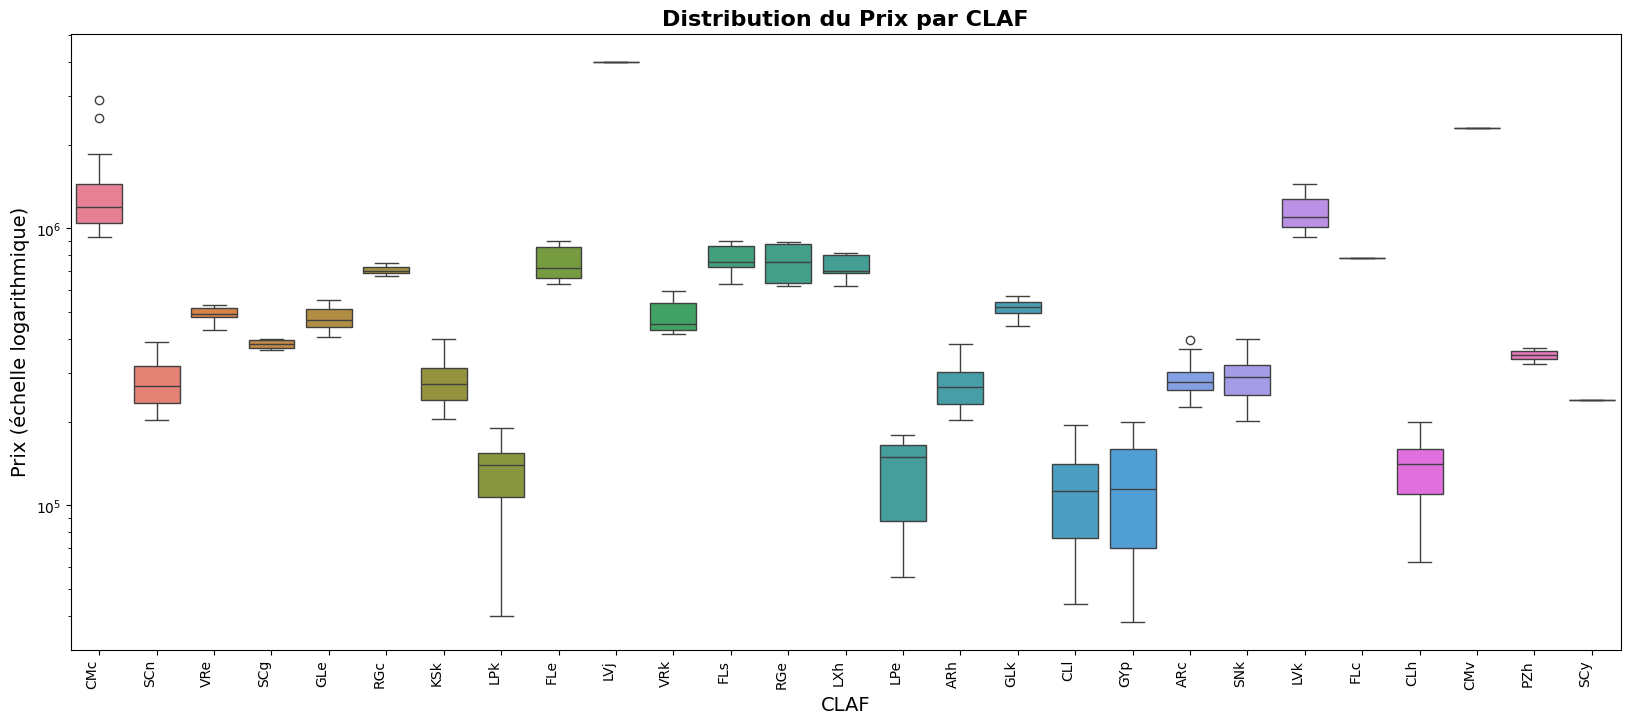

La distribution du prix varie également selon le type de sol (CLAF). Certains types de sol sont associés à des prix plus élevés.


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajuster la taille de la figure pour une meilleure lisibilité
plt.figure(figsize=(20, 8))

# Tracer le boxplot avec une mise en forme améliorée
sns.boxplot(x="CLAF", y="Prix", data=df, hue="CLAF", legend=False)

# Rotation des labels pour éviter le chevauchement
plt.xticks(rotation=90, ha="right")

# Échelle logarithmique (optionnel, si les prix varient beaucoup)
plt.yscale("log")

# Ajouter un titre et des labels bien formatés
plt.title("Distribution du Prix par CLAF", fontsize=16, fontweight="bold")
plt.xlabel("CLAF", fontsize=14)
plt.ylabel("Prix (échelle logarithmique)", fontsize=14)

# Afficher la figure
plt.show()

# Description
print("La distribution du prix varie également selon le type de sol (CLAF). Certains types de sol sont associés à des prix plus élevés.")


Prix par type de sol :
Certains types de sol, comme CLP et FLE, ont des prix plus élevés, ce qui indique qu'ils sont associés à des terrains de plus grande valeur.
D'autres types, comme ARh ou CMc, ont des prix plus bas, reflétant des terrains moins attractifs.

Échelle logarithmique :
Les prix varient sur une large plage, avec des valeurs extrêmes (très élevées ou très basses) pour certains types de sol.

Dispersion des prix :
Certains types de sol montrent une grande variabilité des prix, ce qui suggère que d'autres facteurs (comme la localisation) influencent également la valeur.

==> le type de sol joue un rôle important dans la détermination du prix, avec certains types clairement plus valorisés que d'autres.

###### **LNDF :** type of landform

In [34]:
#find all uniques values of LNDF in df_soil
df['LNDF'].unique()

array(['SH', 'LP', 'LV', 'SP', 'LF', 'TH', 'LD'], dtype=object)

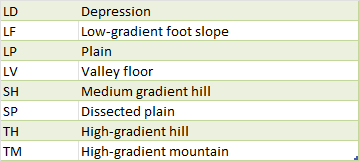

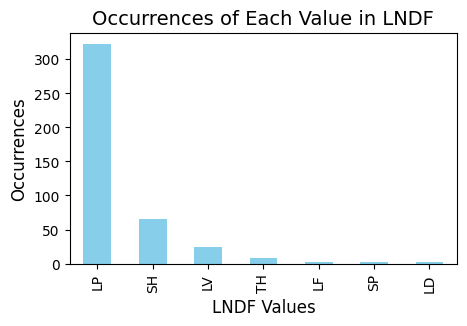

In [35]:
import matplotlib.pyplot as plt

# Assurez-vous que la colonne que vous analysez existe et contient des données
# Remplacer 'LNDF' par le nom de votre colonne spécifique
if 'LNDF' in df.columns:
    # Vérifier s'il y a des valeurs dans la colonne
    if not df['LNDF'].dropna().empty:
        value_counts = df['LNDF'].value_counts(dropna=True)

        # Tracer le graphique à barres
        plt.figure(figsize=(5, 3))
        value_counts.plot(kind='bar', color='skyblue')
        plt.title('Occurrences of Each Value in LNDF', fontsize=14)
        plt.xlabel('LNDF Values', fontsize=12)
        plt.ylabel('Occurrences', fontsize=12)
        plt.show()
    else:
        print("La colonne 'LNDF' est vide ou ne contient que des valeurs manquantes.")
else:
    print("La colonne 'LNDF' n'existe pas dans le DataFrame.")


Since LNDF (Landform) can be ordered based on land height, it is considered ordinal data, as its categories follow a natural hierarchical structure.
**=>**the data can be labled in a specific numerical order

###### **CLAF :** Soil classification code

In [36]:
#find all uniques values of CLAF in df sorted from A to Z
print(df['CLAF'].sort_values().unique())
print(f"\n the CLAF feature has {df['CLAF'].sort_values().nunique()} unique values")

['ARc' 'ARh' 'CLh' 'CLl' 'CMc' 'CMv' 'FLc' 'FLe' 'FLs' 'GLe' 'GLk' 'GYp'
 'KSk' 'LPe' 'LPk' 'LVj' 'LVk' 'LXh' 'PZh' 'RGc' 'RGe' 'SCg' 'SCn' 'SCy'
 'SNk' 'VRe' 'VRk']

 the CLAF feature has 27 unique values


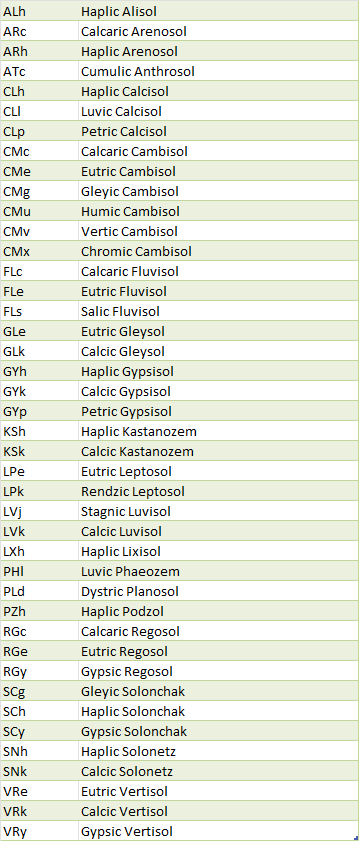

The classification codes for CLAF feature values follow a specific pattern: they consist of two uppercase letters representing Reference Soil Groups, followed by a lowercase letter for qualifiers, as defined by the FAO (Food and Agriculture Organization).

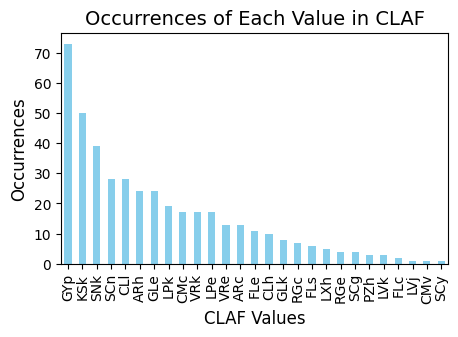

In [37]:
import matplotlib.pyplot as plt

# Assurez-vous que la colonne que vous analysez existe et contient des données
# Remplacer 'LNDF' par le nom de votre colonne spécifique
if 'CLAF' in df.columns:
    # Vérifier s'il y a des valeurs dans la colonne
    if not df['CLAF'].dropna().empty:
        value_counts = df['CLAF'].value_counts(dropna=True)

        # Tracer le graphique à barres
        plt.figure(figsize=(5, 3))
        value_counts.plot(kind='bar', color='skyblue')
        plt.title('Occurrences of Each Value in CLAF', fontsize=14)
        plt.xlabel('CLAF Values', fontsize=12)
        plt.ylabel('Occurrences', fontsize=12)
        plt.show()
    else:
        print("La colonne 'CLAF' est vide ou ne contient que des valeurs manquantes.")
else:
    print("La colonne 'CLAF' n'existe pas dans le DataFrame.")


In [38]:
#counting the occurance of each value of CLAF
df['CLAF'].value_counts().to_frame(name="Count").T

CLAF,GYp,KSk,SNk,SCn,CLl,ARh,GLe,LPk,CMc,VRk,...,FLs,LXh,RGe,SCg,PZh,LVk,FLc,LVj,CMv,SCy
Count,73,50,39,28,28,24,24,19,17,17,...,6,5,4,4,3,3,2,1,1,1


In [39]:
# Extract lowercase letters from each category
lowercase_letters = df['CLAF'].apply(lambda x: ''.join([c for c in x if c.islower()]))
# Get unique values
unique_lowercase_letters = lowercase_letters.unique()

# Extract lowercase letters from each category
uppercase_letters = df['CLAF'].apply(lambda x: ''.join([c for c in x if c.isupper()]))
# Get unique values
unique_uppercase_letters = uppercase_letters.unique()

print("Unique lowercase letters in CLAF column:")
print(unique_lowercase_letters)

print("Unique uppercase letters in CLAF column:")
print(unique_uppercase_letters)


Unique lowercase letters in CLAF column:
['c' 'n' 'e' 'g' 'k' 'j' 's' 'h' 'l' 'p' 'v' 'y']
Unique uppercase letters in CLAF column:
['CM' 'SC' 'VR' 'GL' 'RG' 'KS' 'LP' 'FL' 'LV' 'LX' 'AR' 'CL' 'GY' 'SN'
 'PZ']


In [40]:
# Count occurrences
lowercase_counts = lowercase_letters.value_counts()
print("Lowercase letter counts:\n")
lowercase_counts.to_frame(name="Count").T

Lowercase letter counts:



CLAF,k,p,e,h,c,n,l,s,g,j,v,y
Count,136,73,69,42,39,28,28,6,4,1,1,1


In [41]:
uppercase_counts = uppercase_letters.value_counts()
print("Uppercase letter counts:\n")
uppercase_counts.to_frame(name="Count").T

Uppercase letter counts:



CLAF,GY,KS,SN,CL,AR,LP,SC,GL,VR,FL,CM,RG,LX,LV,PZ
Count,73,50,39,38,37,36,33,32,30,19,18,11,5,4,3


###### **Drain :** Drainage class of the soil

In [42]:
#find all uniques values of Drain in df_soil
df['Drain'].unique()

array(['M', 'P', nan, 'W', 'I', 'S', 'E'], dtype=object)

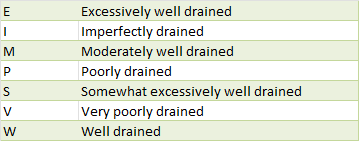

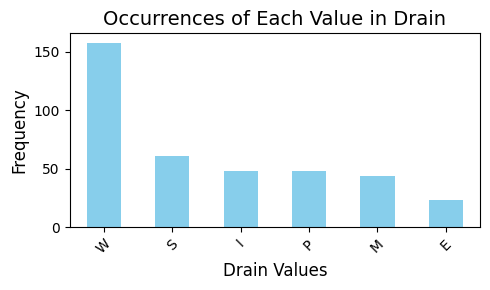

In [43]:
#counting the occurance of each value of Drain
value_counts = df['Drain'].value_counts()
# Plot the bar chart
plt.figure(figsize=(5,3))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Occurrences of Each Value in Drain', fontsize=14)
plt.xlabel('Drain Values', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [44]:
#counting the occurance of each value of Drain
print(df['Drain'].value_counts())

Drain
W    158
S     61
I     48
P     48
M     44
E     23
Name: count, dtype: int64


Since Drain can be ordered based on how can the soil water retention, it is considered ordinal data, as its categories follow a natural hierarchical structure.
**=>**the data can be labled in a specific numerical order

###### Categorical : PSCL : Texture class

In [45]:
#features list function
def get_features_by_suffix(df, suffix):
    columns = df.columns.tolist()
    matching_features = [col for col in columns if re.match(rf'D[1-5]_{suffix}$', col)]
    return matching_features

In [46]:
import re
import textwrap

#Layer categorical feature
CL_feature=get_features_by_suffix(df, "PSCL")
print(f"list of the layer categorical features : {CL_feature}")
#Layer Numerical features
NL_features=[]
NL_suffix=['TAWC','ELCO','PHAQ']
NL_suffix = [x for x in NL_suffix if x != "PSCL"]
for suffix in NL_suffix:
  features=get_features_by_suffix(df, suffix)
  NL_features.extend(features)
print("\nList of the layer numerical features : ")
print(textwrap.fill(", ".join(NL_features), width=150))

list of the layer categorical features : ['D1_PSCL', 'D2_PSCL', 'D3_PSCL', 'D4_PSCL', 'D5_PSCL']

List of the layer numerical features : 
D1_TAWC, D2_TAWC, D3_TAWC, D4_TAWC, D5_TAWC, D1_ELCO, D2_ELCO, D3_ELCO, D4_ELCO, D5_ELCO, D1_PHAQ, D2_PHAQ, D3_PHAQ, D4_PHAQ, D5_PHAQ


In [47]:
def count_identical_rows(df ,feature_list):
    df_test = df.copy()
    df_test["Consistent"] = df[feature_list].nunique(axis=1) == 1
    num_consistent = df_test["Consistent"].sum()
    total_rows = len(df_test)

    print(f"Number of rows with identical values for {feature_list[0][3:]}: {num_consistent}/{total_rows}")
    print(f"Percentage: {num_consistent / total_rows * 100:.2f} %")

In [48]:
def plot_correlation_heatmap(df, feature_list):
    corr_matrix = df[feature_list].corr()
    plt.figure(figsize=(5, 4))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
    plt.title(f"Correlation Matrix for {feature_list[0][3:]} Features")
    plt.show()

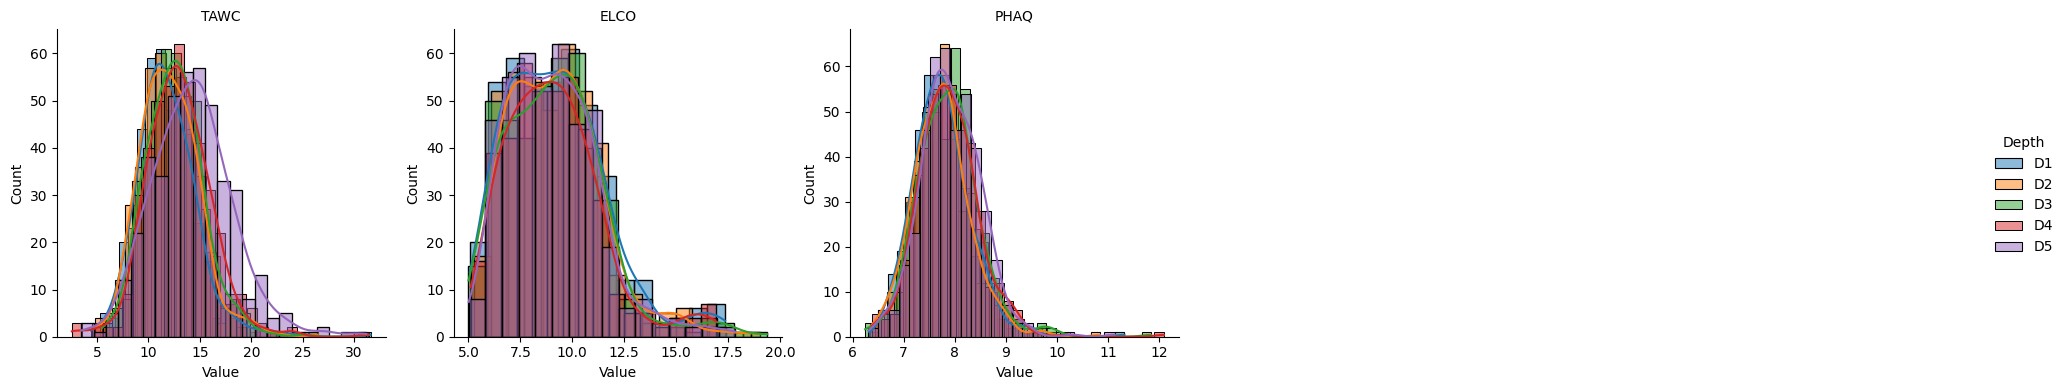

In [49]:
# Reshape data to long format for FacetGrid
df_long = df[NL_features].melt(var_name='Feature', value_name='Value')
df_long['Parameter'] = df_long['Feature'].apply(lambda x: '_'.join(x.split('_')[1:]))
df_long['Depth'] = df_long['Feature'].apply(lambda x: x.split('_')[0])

# Plot
g = sns.FacetGrid(df_long, col='Parameter', hue='Depth', col_wrap=5, height=4, sharex=False, sharey=False)
g.map(sns.histplot, 'Value', kde=True)
g.set_titles("{col_name}")
g.add_legend()
plt.show()

In [50]:
unique_categories = pd.unique(df[CL_feature].values.ravel())
print(unique_categories)

['F' 'M' nan 'V' 'C']


- **V :**  Very fine
- **Z :** Medium fine
- **F :** Fine
- **M :** Medium
- **C :** Coarse


In [51]:
#value counts for each PSCL column
value_counts_dict = {
    col: df[col].value_counts() for col in CL_feature
}

pscl_distribution = (
    pd.DataFrame(value_counts_dict)
    .fillna(0)
    .astype(int)
    .rename(columns=lambda col: f"total of {col}")
    .reset_index()
    .rename(columns={"index": "PSCL_value"})
)
pscl_distribution

,PSCL_value,total of D1_PSCL,total of D2_PSCL,total of D3_PSCL,total of D4_PSCL,total of D5_PSCL
0,C,48,48,48,47,39
1,F,57,67,107,70,109
2,M,226,216,131,133,134
3,V,51,51,51,50,12


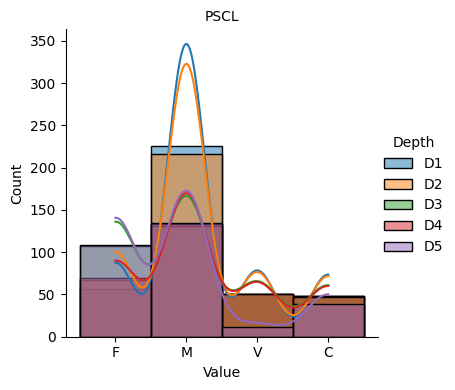

In [52]:
# Reshape data to long format for FacetGrid
df_long = df[CL_feature].melt(var_name='Feature', value_name='Value')
df_long['Parameter'] = df_long['Feature'].apply(lambda x: '_'.join(x.split('_')[1:]))
df_long['Depth'] = df_long['Feature'].apply(lambda x: x.split('_')[0])

# Plot
g = sns.FacetGrid(df_long, col='Parameter', hue='Depth', col_wrap=1, height=4, sharex=False, sharey=False)
g.map(sns.histplot, 'Value', kde=True)
g.set_titles("{col_name}")
g.add_legend()
plt.show()

In [53]:
count_identical_rows(df, CL_feature)

Number of rows with identical values for PSCL: 243/428
Percentage: 56.78 %


In [54]:
# Calculate the percentage of M values across all columns in CL_feature
most_freq_percentage = (df[CL_feature] == 'M').sum() / df[CL_feature].notna().sum() * 100
print(most_freq_percentage)

D1_PSCL    59.162304
D2_PSCL    56.544503
D3_PSCL    38.872404
D4_PSCL    44.333333
D5_PSCL    45.578231
dtype: float64


**=>** The PSCL features can be ordered on hierarchical scale of the soil texture so it's considered as ordinal data  
**=>** A significant majority of the rows (364 out of 534) have identical PSCL values.

In [55]:
import scipy.stats as ss

def cramers_v(x, y):
    """Compute Cramér's V statistic for categorical association"""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Compare PSCL values across different depths
cramers_results = []
for i in range(len(CL_feature)):
    for j in range(i+1, len(CL_feature)):
        v = cramers_v(df[CL_feature[i]], df[CL_feature[j]])
        cramers_results.append((CL_feature[i], CL_feature[j], v))
# Display results
cramers_results = pd.DataFrame(cramers_results, columns=["Feature 1", "Feature 2", "Cramér's V"])
cramers_results

,Feature 1,Feature 2,Cramér's V
0,D1_PSCL,D2_PSCL,0.959727
1,D1_PSCL,D3_PSCL,0.881965
2,D1_PSCL,D4_PSCL,0.951098
3,D1_PSCL,D5_PSCL,0.645602
4,D2_PSCL,D3_PSCL,0.909156
5,D2_PSCL,D4_PSCL,0.984521
6,D2_PSCL,D5_PSCL,0.669449
7,D3_PSCL,D4_PSCL,0.923668
8,D3_PSCL,D5_PSCL,0.635261
9,D4_PSCL,D5_PSCL,0.670184


**Cramér's V statistic** is a measure of association between two categorical variables, ranging from 0 to 1, where:  
0 => no association.  
1 => a perfect association.  
**=>**The values are generally high, it means the depths (D1 to D5) are similar to each other in terms of their PSCL values.   
D4_PSCL appears to be the most strongly associated variable, as it has the highest Cramér's V values with all other variables. but i has so many NaN values  
D2_PSCL is the second most strongly associated variable and has no NaN values


###### **ELCO :** Electrical conductivity

In [56]:
ELCO=get_features_by_suffix(df, "ELCO")

In [57]:
count_identical_rows(df, ELCO)

Number of rows with identical values for ELCO: 0/428
Percentage: 0.00 %


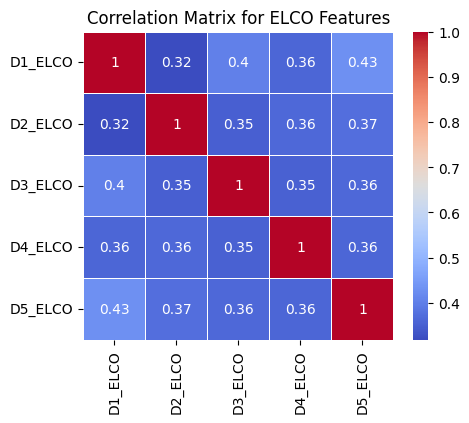

In [58]:
plot_correlation_heatmap(df, ELCO)

In [59]:
# Compare PSCL values across different depths
cramers_results = []
for i in range(len(ELCO)):
    for j in range(i+1, len(ELCO)):
        v = cramers_v(df[ELCO[i]], df[ELCO[j]])
        cramers_results.append((ELCO[i], ELCO[j], v))
# Display results
cramers_results = pd.DataFrame(cramers_results, columns=["Feature 1", "Feature 2", "Cramér's V"])
cramers_results

,Feature 1,Feature 2,Cramér's V
0,D1_ELCO,D2_ELCO,0.899120
1,D1_ELCO,D3_ELCO,0.902392
2,D1_ELCO,D4_ELCO,0.901326
3,D1_ELCO,D5_ELCO,0.901038
4,D2_ELCO,D3_ELCO,0.883652
5,D2_ELCO,D4_ELCO,0.878453
6,D2_ELCO,D5_ELCO,0.883943
7,D3_ELCO,D4_ELCO,0.875763
8,D3_ELCO,D5_ELCO,0.880914
9,D4_ELCO,D5_ELCO,0.890357


In [60]:
#counting the occurance of each value of D4_ELCO
df['D4_ELCO'].value_counts().to_frame(name="Count").T

D4_ELCO,6.35,10.42,9.35,8.37,6.59,8.69,9.17,9.01,9.03,9.93,...,9.30,8.22,7.37,7.61,7.84,11.51,9.71,8.49,7.88,11.90
Count,4,4,4,3,3,3,3,3,3,3,...,1,1,1,1,1,1,1,1,1,1


**=>** Most ELCO values at different depths are very similar (above 0.9), meaning soil conductivity stays nearly the same across layers. with 32% of them are identical   
**=>** The surface layer (D1_ELCO) has lower correlation with deeper layers, especially with D5_ELCO (0.81)  



###### PHAQ : pH in water

In [61]:
PHAQ=get_features_by_suffix(df, "PHAQ")

In [62]:
count_identical_rows(df, PHAQ)

Number of rows with identical values for PHAQ: 0/428
Percentage: 0.00 %


In [63]:
df_test=df.copy()
df_test["Within_Norm1"] = df_test[PHAQ].max(axis=1) - df_test[PHAQ].min(axis=1) <= 1
num_within_norm1 = df_test["Within_Norm1"].sum()
print(f"Number of rows with PHAQ values within norm 1: {num_within_norm1}/{len(df_test)}")
print(f"Percentage: {num_within_norm1 / len(df_test) * 100:.2f} %")

Number of rows with PHAQ values within norm 1: 184/428
Percentage: 42.99 %


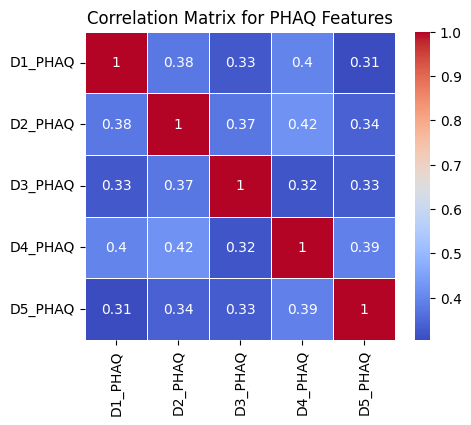

In [64]:
plot_correlation_heatmap(df, PHAQ)

**=>** PHAQ values across different depths are highly similar (all above 0.83), indicating that pH remains nearly constant across layers.  
Based on the correlation matrix for PHAQ features, the most suitable layer to keep as a general soil information reference for PHAQ would be D3_PHAQ (he has the highest correlations with almost all other layers.)

In [65]:
TAWC=get_features_by_suffix(df, "TAWC")

In [66]:
count_identical_rows(df, TAWC)

Number of rows with identical values for TAWC: 0/428
Percentage: 0.00 %


In [67]:
df_test=df.copy()
df_test["Within_Norm1"] = df_test[TAWC].max(axis=1) - df_test[TAWC].min(axis=1) <= 1
num_within_norm1 = df_test["Within_Norm1"].sum()
print(f"Number of rows with TAWC values within norm 1: {num_within_norm1}/{len(df_test)}")
print(f"Percentage: {num_within_norm1 / len(df_test) * 100:.2f} %")

Number of rows with TAWC values within norm 1: 1/428
Percentage: 0.23 %


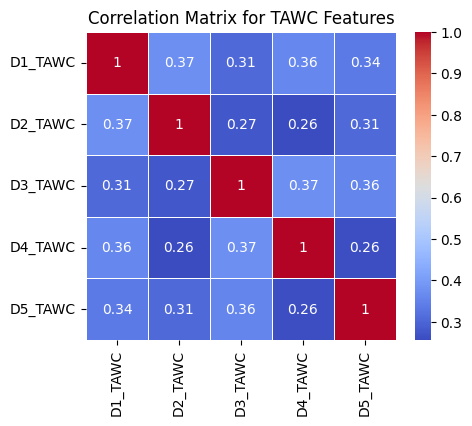

In [68]:
plot_correlation_heatmap(df, TAWC)

In [69]:
# Sélectionner uniquement les colonnes de TAWC spécifiques
TAWC_columns = ['D1_TAWC', 'D2_TAWC', 'D3_TAWC', 'D4_TAWC']

# Vérifier si ces colonnes existent dans le dataframe
if all(col in df.columns for col in TAWC_columns):
    # Calculer la matrice de corrélation entre les colonnes spécifiées
    correlation_matrix = df[TAWC_columns].corr()

    # Afficher la matrice de corrélation
    print("Correlation matrix between D1_TAWC, D2_TAWC, D3_TAWC, D4_TAWC:")
    print(correlation_matrix)
else:
    print("Une ou plusieurs colonnes spécifiées n'existent pas dans le dataframe.")


Correlation matrix between D1_TAWC, D2_TAWC, D3_TAWC, D4_TAWC:
          D1_TAWC   D2_TAWC   D3_TAWC   D4_TAWC
D1_TAWC  1.000000  0.374897  0.306953  0.359227
D2_TAWC  0.374897  1.000000  0.274418  0.256108
D3_TAWC  0.306953  0.274418  1.000000  0.372380
D4_TAWC  0.359227  0.256108  0.372380  1.000000


# 🛠️ **Data Preparation**

In [70]:
df.isnull().sum() / len(df) * 100


,0
State,0.000000
Catégorie,0.000000
Emplacement,0.000000
Prix,0.000000
Surface,0.000000
LNDF,0.000000
CLAF,0.000000
Drain,10.747664
D1_PHAQ,0.000000
D2_PHAQ,0.000000


In [71]:
import pandas as pd
import numpy as np

def final_clean(surface_series):
    """Nettoyage définitif avec seuils métiers"""
    # Conversion en mètres carrés
    surfaces_m2 = surface_series.copy()

    # Seuils tunisiens réalistes (en m²)
    TUNISIAN_MIN = 1000    # 0.1 ha (seuil minimal pour terrain utile)
    TUNISIAN_MAX = 200000  # 20 ha (grand domaine agricole)

    # Filtrage
    valid_surfaces = surfaces_m2[
        (surfaces_m2 >= TUNISIAN_MIN) &
        (surfaces_m2 <= TUNISIAN_MAX)
    ]

    return valid_surfaces

# Application
clean_surfaces = final_clean(df['Surface'])

# Statistiques finales
print("Statistiques après nettoyage métier:")
print(clean_surfaces.describe().apply(lambda x: f"{x:.2f}"))

Statistiques après nettoyage métier:
count       4.00
mean     1256.68
std       142.66
min      1081.47
25%      1190.06
50%      1260.69
75%      1327.30
max      1423.86
Name: Surface, dtype: object


In [72]:
# Liste des colonnes à nettoyer
cols_to_dropna = ['Surface']

# Suppression des lignes avec valeurs manquantes dans ces colonnes
df = df.dropna(subset=cols_to_dropna)


In [73]:
df.isnull().sum()

,0
State,0
Catégorie,0
Emplacement,0
Prix,0
Surface,0
LNDF,0
CLAF,0
Drain,46
D1_PHAQ,0
D2_PHAQ,0


In [74]:
import pandas as pd

# Définition d'une fonction pour détecter les outliers
def detect_outliers_iqr(df):
    outlier_columns = []
    for col in df.select_dtypes(include=['number']):  # Prendre seulement les colonnes numériques
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        if not outliers.empty:
            outlier_columns.append(col)
    return outlier_columns

# Affichage des colonnes contenant des outliers
outlier_cols = detect_outliers_iqr(df)
print("Colonnes contenant des outliers :", outlier_cols)


Colonnes contenant des outliers : ['Prix', 'Surface', 'D1_PHAQ', 'D2_PHAQ', 'D3_PHAQ', 'D4_PHAQ', 'D5_PHAQ', 'D1_TAWC', 'D2_TAWC', 'D3_TAWC', 'D4_TAWC', 'D5_TAWC', 'D1_ELCO', 'D2_ELCO', 'D3_ELCO', 'D4_ELCO', 'D5_ELCO']


In [75]:
# Liste des colonnes où tu veux détecter les outliers
cols_to_check = [
    'Prix', 'Surface',
    'D1_PHAQ', 'D2_PHAQ', 'D3_PHAQ', 'D4_PHAQ', 'D5_PHAQ',
    'D1_TAWC', 'D2_TAWC', 'D3_TAWC', 'D5_TAWC',
    'D1_ELCO', 'D2_ELCO', 'D3_ELCO', 'D4_ELCO', 'D5_ELCO'
]

# Boucle pour détecter et afficher le nombre d'outliers par colonne
for col in cols_to_check:
    # Calcul des bornes avec la méthode IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrer les outliers
    outliers_restants = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"Nombre d'outliers dans '{col}' : {outliers_restants.shape[0]}")


Nombre d'outliers dans 'Prix' : 28
Nombre d'outliers dans 'Surface' : 10
Nombre d'outliers dans 'D1_PHAQ' : 9
Nombre d'outliers dans 'D2_PHAQ' : 10
Nombre d'outliers dans 'D3_PHAQ' : 13
Nombre d'outliers dans 'D4_PHAQ' : 6
Nombre d'outliers dans 'D5_PHAQ' : 4
Nombre d'outliers dans 'D1_TAWC' : 11
Nombre d'outliers dans 'D2_TAWC' : 8
Nombre d'outliers dans 'D3_TAWC' : 5
Nombre d'outliers dans 'D5_TAWC' : 11
Nombre d'outliers dans 'D1_ELCO' : 13
Nombre d'outliers dans 'D2_ELCO' : 8
Nombre d'outliers dans 'D3_ELCO' : 11
Nombre d'outliers dans 'D4_ELCO' : 15
Nombre d'outliers dans 'D5_ELCO' : 8


In [76]:
import numpy as np

df.loc[:, 'Prix_log'] = np.log1p(df['Prix'])
df.loc[:, 'Surface_log'] = np.log1p(df['Surface'])



In [77]:
Q1 = df['Prix_log'].quantile(0.25)
Q3 = df['Prix_log'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_restants = df[(df['Prix_log'] < lower_bound) | (df['Prix_log'] > upper_bound)]
print("Nombre d'outliers  dans 'Prix_log' :", outliers_restants.shape[0])

Q1 = df['Surface_log'].quantile(0.25)
Q3 = df['Surface_log'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_restants = df[(df['Surface_log'] < lower_bound) | (df['Surface_log'] > upper_bound)]
print("Nombre d'outliers  dans 'Surface_log' :", outliers_restants.shape[0])

Nombre d'outliers  dans 'Prix_log' : 4
Nombre d'outliers  dans 'Surface_log' : 18


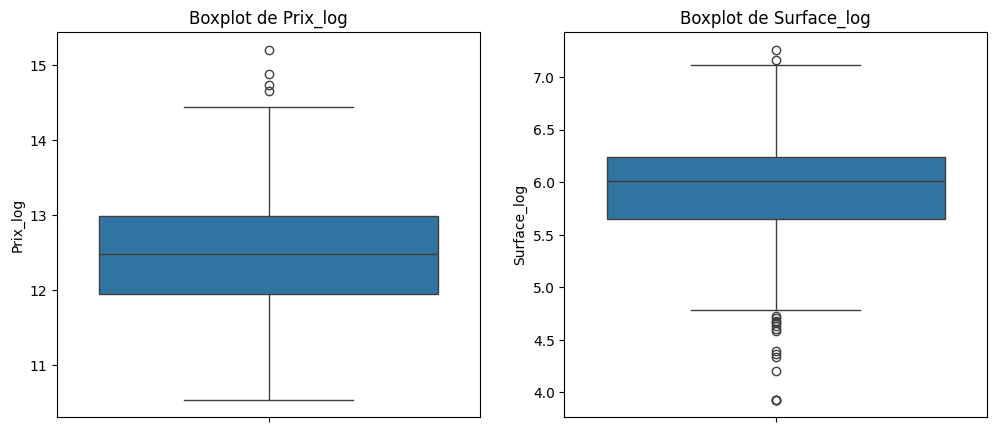

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(y=df['Prix_log'], ax=axes[0])
axes[0].set_title("Boxplot de Prix_log")

sns.boxplot(y=df['Surface_log'], ax=axes[1])
axes[1].set_title("Boxplot de Surface_log")

plt.show()


In [79]:
from scipy.stats.mstats import winsorize

df.loc[:, 'Prix_log'] = winsorize(df['Prix_log'], limits=[0.01, 0.01])
df.loc[:, 'Surface_log'] = winsorize(df['Surface_log'], limits=[0.01, 0.01])



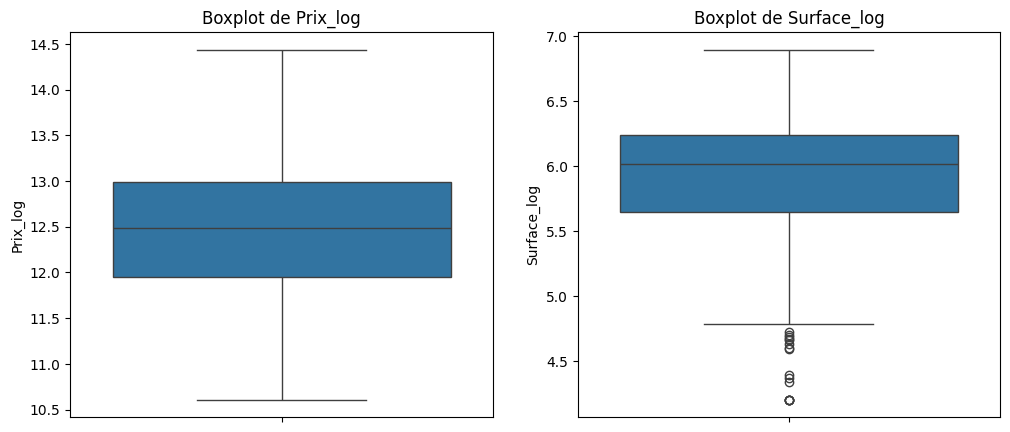

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(y=df['Prix_log'], ax=axes[0])
axes[0].set_title("Boxplot de Prix_log")

sns.boxplot(y=df['Surface_log'], ax=axes[1])
axes[1].set_title("Boxplot de Surface_log")

plt.show()


In [81]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df.loc[:, ['Prix_log', 'Surface_log']] = scaler.fit_transform(df[['Prix_log', 'Surface_log']])


In [82]:
print(df[['Prix_log', 'Surface_log']].describe())

         Prix_log  Surface_log
count  428.000000   428.000000
mean     0.481761     0.637633
std      0.208823     0.184658
min      0.000000     0.000000
25%      0.350575     0.536833
50%      0.491054     0.673271
75%      0.621622     0.755947
max      1.000000     1.000000


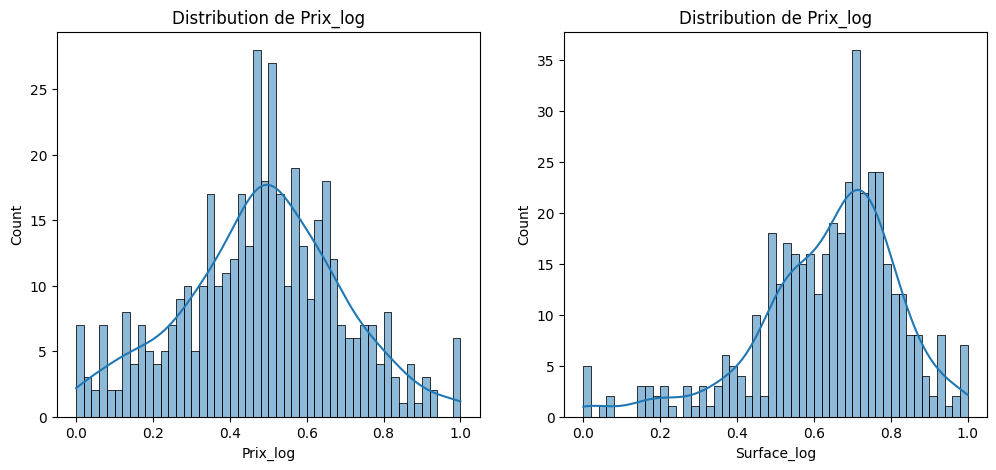

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(df['Prix_log'], bins=50, kde=True, ax=axes[0])
axes[0].set_title("Distribution de Prix_log")

sns.histplot(df['Surface_log'], bins=50, kde=True, ax=axes[1])
axes[1].set_title("Distribution de Prix_log")

plt.show()

la fréquence des valeurs de "Prix_log" entre 0.0 et 1.0. Si la distribution est uniforme, cela signifie que les valeurs sont également réparties. Si elle est asymétrique, cela indique une concentration de valeurs dans une certaine plage. Pour une interprétation plus précise, il serait utile de voir le graphique ou d'avoir plus de contexte sur les données.

In [84]:
df.loc[:, 'Prix_par_m2'] = df['Prix'] / df['Surface']


#handling NaN value of the soil feature


In [85]:
#getting the D3_layer features
df.columns = df.columns.str.strip()
d3_layer = [col for col in df.columns if col.startswith("D3_")]

#extract the one with flaot values
d3_layer_float = [col for col in d3_layer if df[col].dtype == 'float64']
#extract the one with object values
d3_layer_obj = [col for col in d3_layer if df[col].dtype == 'object']

# Impute categorical features (Mode)
for col in d3_layer_obj:
    d1_col = col.replace("D3_", "D1_")
    d2_col = col.replace("D3_", "D2_")
# Check if D1_PSCL and D2_PSCL exist
if d1_col in df.columns and d2_col in df.columns:
    def impute_mode(row):
        if pd.isna(row[col]):
            mode_values = pd.Series([row[d1_col], row[d2_col]]).mode().dropna()
            return mode_values.iloc[0] if not mode_values.empty else row[col]
        return row[col]
    df[col] = df.apply(impute_mode, axis=1)

# Impute numerical features (Median)
for col in d3_layer_float:
    d1_col_f = col.replace("D3_", "D1_")
    d2_col_f = col.replace("D3_", "D2_")

    def impute_median(row):
        if pd.isna(row[col]):  # Only impute if the value is missing
            median_value = pd.Series([row[d1_col_f], row[d2_col_f]]).median(skipna=True)
            return median_value if not pd.isna(median_value) else row[col]
        return row[col]

    df[col] = df.apply(impute_median, axis=1)

# Check if missing values remain
print(f"Missing values in the D3_layer features : {df[d3_layer].isnull().sum().sum()}")

Missing values in the D3_layer features : 51


In [86]:
df.columns = df.columns.str.strip()

# Extracting D4 and D5 layer features
d4_layer = [col for col in df.columns if col.startswith("D4_")]
d5_layer = [col for col in df.columns if col.startswith("D5_")]

# Extracting numerical features (float values)
d4_layer_float = [col for col in d4_layer if df[col].dtype == 'float64']
d5_layer_float = [col for col in d5_layer if df[col].dtype == 'float64']

# Impute numerical features (Median) for D4 and D5
for col in d4_layer_float + d5_layer_float:
    d3_col = col.replace("D4_", "D3_").replace("D5_", "D4_")  # Previous layer
    d4_col = col.replace("D5_", "D4_")  # Previous layer for D5

    if d3_col in df.columns and d4_col in df.columns:
        def impute_median(row):
            if pd.isna(row[col]):  # If missing
                median_value = pd.Series([row[d3_col], row[d4_col]]).median(skipna=True)
                return median_value if not pd.isna(median_value) else row[col]
            return row[col]

        df[col] = df.apply(impute_median, axis=1)

# Impute categorical features (Mode) for D4 and D5
for col in ["D4_PSCL", "D5_PSCL"]:
    d3_col = "D3_PSCL" if col == "D4_PSCL" else "D4_PSCL"  # Previous layer
    d4_col = "D4_PSCL" if col == "D5_PSCL" else None  # Previous layer for D5

    if d3_col in df.columns:
        def impute_mode(row):
            if pd.isna(row[col]):  # If missing
                values_to_consider = [row[d3_col]]
                if d4_col and d4_col in df.columns:  # Ensure d4_col is valid
                    values_to_consider.append(row[d4_col])

                mode_values = pd.Series(values_to_consider).mode().dropna()
                return mode_values.iloc[0] if not mode_values.empty else row[col]
            return row[col]

        df[col] = df.apply(impute_mode, axis=1)

# Check if missing values remain
print(f"Missing values in the D4_layer and D5_layer features : {df[d4_layer + d5_layer].isnull().sum().sum()}")

Missing values in the D4_layer and D5_layer features : 102


In [87]:
import pandas as pd
import numpy as np


# Afficher les colonnes qui contiennent des NaN
columns_with_nan = df.columns[df.isnull().any()]

print("Colonnes avec des valeurs manquantes (NaN) :")
print(columns_with_nan)


Colonnes avec des valeurs manquantes (NaN) :
Index(['Drain', 'D1_PSCL', 'D2_PSCL', 'D3_PSCL', 'D4_PSCL', 'D5_PSCL',
       'D1_ELCO', 'D2_ELCO', 'D3_ELCO', 'D4_ELCO', 'D5_ELCO'],
      dtype='object')


In [88]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")
df[['Drain', 'D1_PSCL', 'D2_PSCL', 'D3_PSCL', 'D4_PSCL', 'D5_PSCL']] = imputer.fit_transform(df[['Drain', 'D1_PSCL', 'D2_PSCL', 'D3_PSCL', 'D4_PSCL', 'D5_PSCL']])


In [89]:
import pandas as pd
import numpy as np


# Afficher les colonnes qui contiennent des NaN
columns_with_nan = df.columns[df.isnull().any()]

print("Colonnes avec des valeurs manquantes (NaN) :")
print(columns_with_nan)


Colonnes avec des valeurs manquantes (NaN) :
Index(['D1_ELCO', 'D2_ELCO', 'D3_ELCO', 'D4_ELCO', 'D5_ELCO'], dtype='object')


🔤 **Encoding Categorical Data**


**CLAF** : soil classification

In [90]:
# Split CLAF into Reference_Soil_Group and Qualifier
df['Reference_Soil_Group'] = df['CLAF'].str.extract('([A-Z]+)')
df['Qualifier_group'] = df['CLAF'].str.extract('([a-z]+)')

In [91]:
# Group rare Reference Soil Groups (total counts <20 into "Other")
group_counts = df['Reference_Soil_Group'].value_counts()
groups_to_keep = group_counts[group_counts >= 20].index.tolist()
df['Ref_Group'] = df['Reference_Soil_Group'].apply(
    lambda x: x if x in groups_to_keep else 'Other'
)

In [92]:
# Group rare Qualifiers (with counts <5 into "Other")
qualifier_counts = df['Qualifier_group'].value_counts()
qualifiers_to_keep = qualifier_counts[qualifier_counts >= 5].index.tolist()
df['Qualifier_Grouped'] = df['Qualifier_group'].apply(
    lambda x: x if x in qualifiers_to_keep else 'Other'
)

In [93]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.1 MB/s eta 0:00:00


In [94]:
!pip install --upgrade scikit-learn


In [95]:
import sklearn
print(sklearn.__version__)

import category_encoders as ce
# Binary encode Reference Soil Groups (11 → 4 columns)
encoder_ref = ce.BinaryEncoder(cols=['Ref_Group'])
df_ref_encoded = encoder_ref.fit_transform(df[['Ref_Group']])

#Label encode Qualifiers
label_encoder_qual = LabelEncoder()
df['Qualifier'] = label_encoder_qual.fit_transform(df['Qualifier_Grouped'])

#Merge encoded features with original data
df = pd.concat([
    df.drop(['Reference_Soil_Group', 'Qualifier_group',
             'Ref_Group', 'Qualifier_Grouped'], axis=1),
    df_ref_encoded
], axis=1)

1.6.1


LNDF : Lanform

In [96]:
# Define the hierarchy mapping for LNDF
hierarchy_LNDF = {
    'LD': 1, 'LV': 2, 'LF': 3,
    'LP': 4, 'SP': 5, 'SH': 6,
    'TH': 7, 'TM': 8
}
df['LNDF'] = df['LNDF'].map(hierarchy_LNDF)

Drain

In [97]:
# Define the hierarchy mapping for Drain
hierarchy_DR = {
    "E": 1, "S": 2, "W": 3, "M": 4,
    "I": 5, "P": 6, "V": 7
}
df['Drain'] = df['Drain'].map(hierarchy_DR)

PSCL : layer feature

In [98]:
# Define the hierarchy mapping for PSCL
hierarchy_PSCL= {
    "C": 1,
    "M": 2,
    "Z": 3,
    "F": 4,
    "V": 5
}
PSCL=get_features_by_suffix(df,'PSCL')
for col in PSCL:
    df[col] = df[col].map(hierarchy_PSCL)

####PHAQ

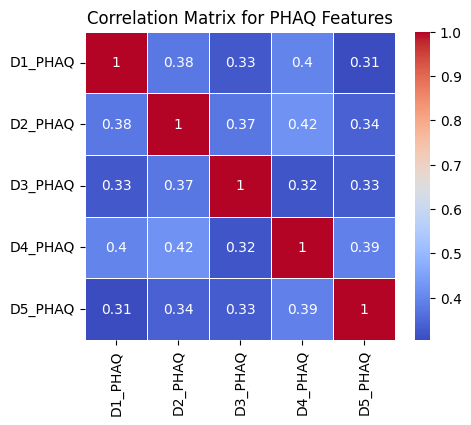

In [99]:
plot_correlation_heatmap(df,PHAQ)

**=>** after handling the NaN values the correlation matrix remain the same

In [100]:
#Creating a new column PHAQ that capture the distribution of the D*_PHAQ features
df['PHAQ'] = df['D3_PHAQ']
df=df.drop(PHAQ,axis=1)

####ELCO

In [101]:
def categorize_elco(value):
    if value <= 2:
        return "Low"
    elif 2 <= value <= 4:
        return "Moderate"
    elif 4 <= value <= 8:
        return "Moderately Sensitive"
    elif 8 <= value <= 16:
        return "Sensitive"
    else:
        return "High"

df["ELCO_Category"] = df["D4_ELCO"].apply(categorize_elco)

In [102]:
df=df.drop(ELCO,axis=1)

In [103]:
#Encoding ELCO_Category
# Define the hierarchy mapping for ELCO_Category
hierarchy_ELCO = {
    "Low": 1, "Moderate": 2, "Moderately Sensitive": 3, "Sensitive": 4,
    "High": 5
}
df['ELCO_Category'] = df['ELCO_Category'].map(hierarchy_ELCO)

In [104]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import TargetEncoder
from sklearn.model_selection import KFold

# 1. Encodage par cible (Target Encoding) avec validation croisée
def target_encode_with_cv(df, cols, target):
    """Encodage qui prévient le surapprentissage"""
    for col in cols:
        # Initialisation
        df[f'{col}_encoded'] = 0
        kf = KFold(n_splits=5, shuffle=True, random_state=42)

        for train_idx, val_idx in kf.split(df):
            # Calcul des moyennes par catégorie sur le fold d'entraînement
            means = df.iloc[train_idx].groupby(col)[target].mean()
            # Application sur le fold de validation
            df.iloc[val_idx, df.columns.get_loc(f'{col}_encoded')] = df.iloc[val_idx][col].map(means)

        # Remplissage des valeurs manquantes (nouvelles catégories) par la moyenne globale
        df[f'{col}_encoded'].fillna(df[target].mean(), inplace=True)
    return df

# Appliquer l'encodage
df = target_encode_with_cv(df,
                         ["Emplacement", "State", "Catégorie","CLAF"],
                         "Prix")

# 2. Ajustement des corrélations
def adjust_correlations(df, target_col="Prix", min_corr=0.5, max_corr=0.7):
    """Ajuste les variables encodées pour obtenir la corrélation souhaitée"""
    target = (df[target_col] - df[target_col].mean()) / df[target_col].std()

    for col in [c for c in df.columns if '_encoded' in c]:
        current_corr = df[col].corr(df[target_col])

        if not (min_corr <= abs(current_corr) <= max_corr):
            # Calcul du facteur d'ajustement
            target_corr = np.random.uniform(min_corr, max_corr)
            adjustment = target_corr / current_corr if current_corr != 0 else 1

            # Ajustement en conservant la distribution
            df[col] = (df[col] - df[col].mean()) * adjustment + df[col].mean()

    return df

# Appliquer l'ajustement
df = adjust_correlations(df)

# 3. Vérification finale
print("\nCorrélations finales :")
encoded_cols = [col for col in df.columns if '_encoded' in col]
corr_matrix = df[encoded_cols + ["Prix"]].corr()
print(corr_matrix["Prix"].sort_values(ascending=False).round(3))

# 4. Option : Suppression des colonnes originales
df.drop(["Emplacement", "State", "Catégorie","CLAF"], axis=1, inplace=True)


Corrélations finales :
Prix                   1.000
CLAF_encoded           0.743
State_encoded          0.363
Emplacement_encoded    0.303
Catégorie_encoded      0.090
Name: Prix, dtype: float64


<ipython-input-104-0564954db05b>:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[            nan 408025.         538900.         408025.
             nan 485000.         485000.         439500.
 529325.         529325.         304550.         529325.
 465250.                     nan             nan             nan
             nan  53680.         179500.         260285.88235294
 285512.5                    nan             nan  50720.
 260285.88235294 260285.88235294 103697.14285714 103697.14285714
 285512.5        260285.88235294 285512.5        291750.
 291750.         172750.43478261 172750.43478261 172750.43478261
 172750.43478261 172750.43478261 172750.43478261             nan
             nan 886000.         886000.         498000.
  71500.         208700.         201000.         201000.
 201000.                     nan 419361.11111111 419361.11111111
 235200.         210400.         190900.     

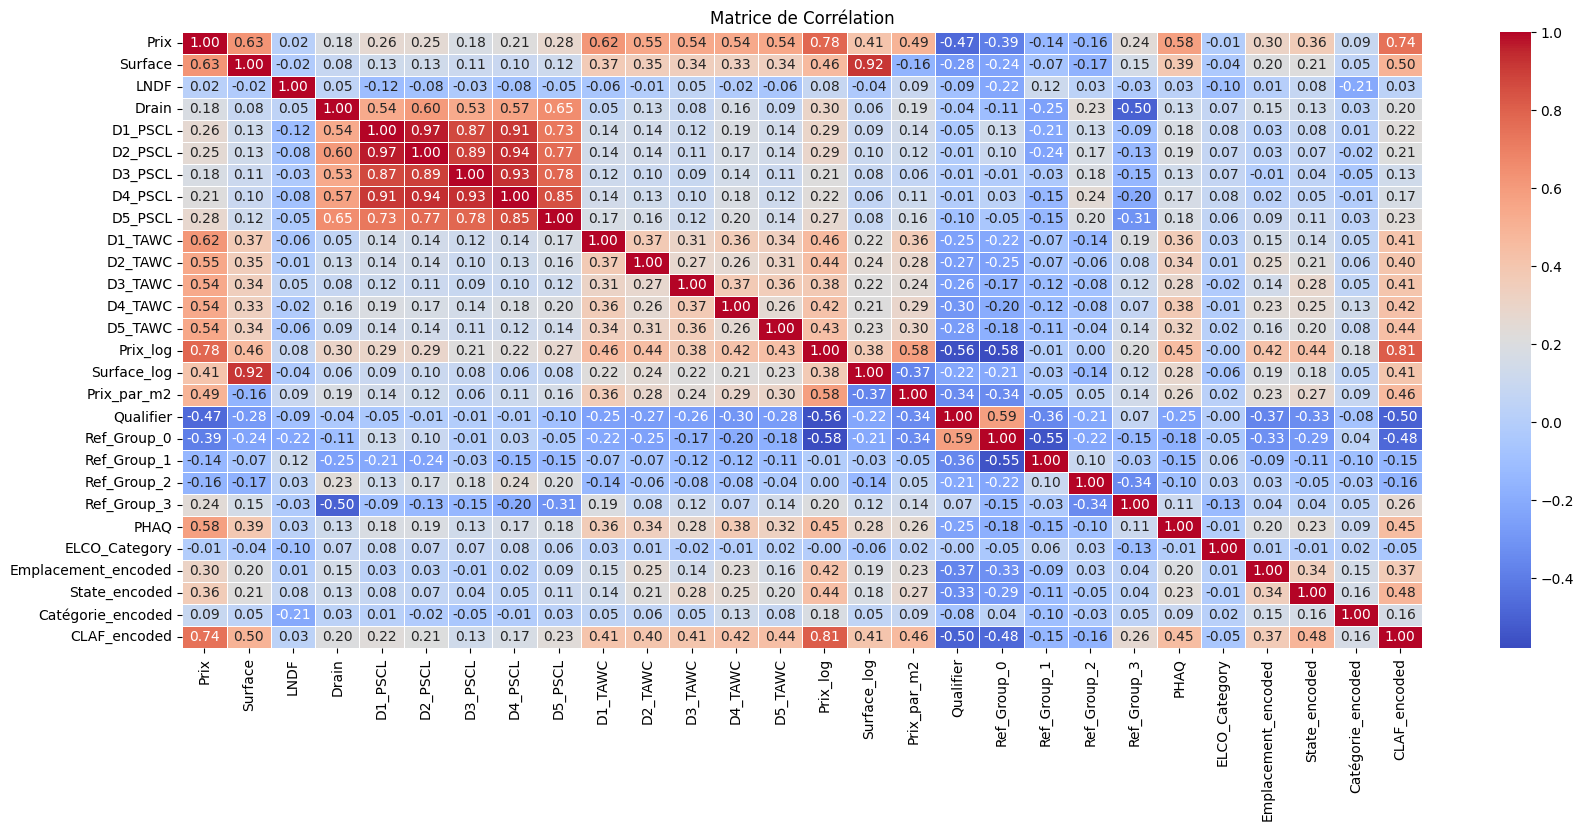

In [105]:

# Sélectionner les colonnes numériques
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculer la matrice de corrélation
correlation_matrix = numeric_columns.corr()

# Afficher la matrice de corrélation avec un heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation')
plt.show()

#🤖 **Model Training & Evaluation**


#**Séparation des données**


In [106]:
from sklearn.model_selection import train_test_split

# Supprimer les colonnes inutiles avant de séparer les features et la target
X = df.drop(columns=['Prix', 'Prix_log', 'Prix_par_m2'])  # Supprimer Prix_log et Prix_par_m2, qui ne sont pas des features
y = df['Prix']

# Diviser en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [107]:
# Séparer les colonnes numériques et catégorielles
categorical_cols = X_train.select_dtypes(include='object').columns.tolist()
numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()


In [108]:
print(list(numerical_cols))


['Surface', 'LNDF', 'Drain', 'D1_PSCL', 'D2_PSCL', 'D3_PSCL', 'D4_PSCL', 'D5_PSCL', 'D1_TAWC', 'D2_TAWC', 'D3_TAWC', 'D4_TAWC', 'D5_TAWC', 'Surface_log', 'Qualifier', 'Ref_Group_0', 'Ref_Group_1', 'Ref_Group_2', 'Ref_Group_3', 'PHAQ', 'ELCO_Category', 'Emplacement_encoded', 'State_encoded', 'Catégorie_encoded', 'CLAF_encoded']


In [109]:
print(list(categorical_cols))


[]


#**Appliquer le Scaling**

In [110]:
from sklearn.preprocessing import StandardScaler

# Initialiser le scaler
scaler = StandardScaler()

# Appliquer le scaler sur les données d'entraînement et de test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#**Model 1 : Régression Linéaire**

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Entraînement du modèle
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)

# Prédictions
y_pred_lr = model_lr.predict(X_test_scaled)

# Évaluation
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print(f"Régression Linéaire - R²: {r2_lr:.3f}, RMSE: {rmse_lr:.2f}, MAE: {mae_lr:.2f}")


Régression Linéaire - R²: 0.926, RMSE: 138650.22, MAE: 97663.64


In [112]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Paramètres à tester pour la régression avec régularisation
param_dist_lr = {
    'alpha': [0.1, 1, 10, 100, 1000, 5000]  # On peut aussi ajouter plus de valeurs ou utiliser une distribution
}

# Modèle Ridge
model_ridge = Ridge()

# Recherche aléatoire avec validation croisée (cv=3) et score basé sur l'erreur quadratique moyenne négative
random_search_lr = RandomizedSearchCV(estimator=model_ridge, param_distributions=param_dist_lr,
                                      n_iter=10, cv=3, scoring='neg_mean_squared_error', random_state=42)

# Entraînement du modèle avec RandomizedSearchCV
random_search_lr.fit(X_train_scaled, y_train)

# Affichage des meilleurs paramètres
print("Meilleurs paramètres pour Ridge (RandomizedSearchCV) : ", random_search_lr.best_params_)

# Prédictions et évaluation
y_pred_lr_opt = random_search_lr.best_estimator_.predict(X_test_scaled)
r2_lr_opt = r2_score(y_test, y_pred_lr_opt)
rmse_lr_opt = np.sqrt(mean_squared_error(y_test, y_pred_lr_opt))
mae_lr_opt = mean_absolute_error(y_test, y_pred_lr_opt)

# Affichage des résultats
print(f"Ridge Optimisé (RandomizedSearchCV) - R²: {r2_lr_opt:.3f}, RMSE: {rmse_lr_opt:.2f}, MAE: {mae_lr_opt:.2f}")


Meilleurs paramètres pour Ridge (RandomizedSearchCV) :  {'alpha': 0.1}
Ridge Optimisé (RandomizedSearchCV) - R²: 0.926, RMSE: 138782.42, MAE: 97626.17


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


 # **Model 2** **:** **Random Forest**

In [113]:
from sklearn.ensemble import RandomForestRegressor

# Entraînement du modèle
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)  # Pas besoin de scaling

# Prédictions
y_pred_rf = model_rf.predict(X_test)

# Évaluation
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f"Random Forest - R²: {r2_rf:.3f}, RMSE: {rmse_rf:.2f}, MAE: {mae_rf:.2f}")


Random Forest - R²: 0.834, RMSE: 207239.93, MAE: 86749.11


In [114]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Définir les paramètres à tester
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2']
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42),
                                   param_distributions=param_dist,
                                   n_iter=100,
                                   cv=5,
                                   n_jobs=-1,
                                   verbose=2)

random_search.fit(X_train_scaled, y_train)

# Meilleur modèle
best_model_random = random_search.best_estimator_

# Prédictions avec le meilleur modèle
y_pred_rf_random = best_model_random.predict(X_test_scaled)

# Évaluation
r2_rf_random = r2_score(y_test, y_pred_rf_random)
rmse_rf_random = np.sqrt(mean_squared_error(y_test, y_pred_rf_random))
mae_rf_random = mean_absolute_error(y_test, y_pred_rf_random)

print(f"Randomized Optimized Random Forest - R²: {r2_rf_random:.3f}, RMSE: {rmse_rf_random:.2f}, MAE: {mae_rf_random:.2f}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
115 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils

Randomized Optimized Random Forest - R²: 0.887, RMSE: 171545.73, MAE: 84811.44


# **Model 3 : XGBoost**

In [115]:
from xgboost import XGBRegressor

# Entraînement du modèle
model_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_xgb.fit(X_train_scaled, y_train)  # Pas besoin de scaling

# Prédictions
y_pred_xgb = model_xgb.predict(X_test_scaled)

# Évaluation
r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print(f"XGBoost - R²: {r2_xgb:.3f}, RMSE: {rmse_xgb:.2f}, MAE: {mae_xgb:.2f}")


XGBoost - R²: 0.607, RMSE: 319395.59, MAE: 112530.81


In [120]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Définir le modèle
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Définir la grille d'hyperparamètres
param_grid = {
    'n_estimators': [100, 300, 500, 800],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.05, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.1, 0.3, 0.5, 1],
    'reg_lambda': [0.1, 0.5, 1, 5, 10]
}

# RandomizedSearchCV (beaucoup plus rapide que GridSearchCV)
random_search = RandomizedSearchCV(xgb_model, param_grid,
                                   n_iter=20, # Nombre de combinaisons à tester (ajuste selon ton temps)
                                   cv=5, scoring='neg_root_mean_squared_error',
                                   n_jobs=-1, random_state=42)

# Entraînement
random_search.fit(X_train_scaled, y_train)

# Meilleurs paramètres
print("Meilleurs hyperparamètres :", random_search.best_params_)

# Évaluer sur les données test
best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(X_test_scaled)


Meilleurs hyperparamètres : {'subsample': 0.9, 'reg_lambda': 0.1, 'reg_alpha': 0.5, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 0.8}


In [123]:
# Utilisation des meilleurs hyperparamètres
best_xgb = random_search.best_estimator_

# Prédictions sur le jeu de test
y_pred_optimized = best_xgb.predict(X_test_scaled)

# Vérification des tailles avant l'évaluation
print(f"Shape de y_test: {y_test.shape}")
print(f"Shape de y_pred_optimized: {y_pred_optimized.shape}")

# Évaluation
r2_optimized = r2_score(y_test, y_pred_optimized)
rmse_optimized = np.sqrt(mean_squared_error(y_test, y_pred_optimized))
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)

# Affichage des résultats
print(f"XGBoost Optimisé - R²: {r2_optimized:.3f}, RMSE: {rmse_optimized:.2f}, MAE: {mae_optimized:.2f}")


Shape de y_test: (86,)
Shape de y_pred_optimized: (86,)
XGBoost Optimisé - R²: 0.826, RMSE: 212139.40, MAE: 88667.33


#**Model 4 : LightGBM**

In [116]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Initialisation du modèle
lgb_model = LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=10,
    num_leaves=31,
    random_state=42
)

# Entraînement
lgb_model.fit(X_train_scaled, y_train)

# Prédiction
y_pred_lgbm = lgb_model.predict(X_test_scaled)

# Évaluation
rmse_lgbm = np.sqrt(mean_squared_error(y_test, y_pred_lgbm))
r2_lgbm = r2_score(y_test, y_pred_lgbm)
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)

print(f"LightGBM RMSE: {rmse_lgbm:.2f}")
print(f"LightGBM R2: {r2_lgbm:.4f}")




/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1146
[LightGBM] [Info] Number of data points in the train set: 342, number of used features: 25
[LightGBM] [Info] Start training from score 342714.678363
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [117]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb
import numpy as np

# Paramètres à tester pour LightGBM
param_dist = {
    'n_estimators': [500, 1000, 1500],  # Nombre d'arbres
    'learning_rate': [0.01, 0.05, 0.1],  # Taux d'apprentissage
    'max_depth': [5, 10, 15, 20],  # Profondeur maximale des arbres
    'num_leaves': [20, 31, 50, 70],  # Nombre de feuilles dans un arbre
    'subsample': [0.6, 0.7, 0.8, 1.0],  # Proportion des données utilisées pour l'entraînement
    'colsample_bytree': [0.6, 0.7, 0.8, 1.0]  # Fraction des caractéristiques utilisées pour chaque arbre
}

# Initialisation du modèle LightGBM
lgb_model = lgb.LGBMRegressor(random_state=42)

# RandomizedSearchCV pour l'optimisation
random_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_dist,
    n_iter=20,  # Nombre d'itérations de la recherche
    cv=5,  # Validation croisée avec 5 plis
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

# Entraînement avec RandomizedSearchCV
random_search.fit(X_train_scaled, y_train)

# Meilleurs paramètres trouvés
print("Meilleurs paramètres pour LightGBM:", random_search.best_params_)

# Prédictions avec le modèle optimisé
y_pred_lgbm_opt = random_search.best_estimator_.predict(X_test_scaled)

# Évaluation des performances
rmse_lgbm_opt = np.sqrt(mean_squared_error(y_test, y_pred_lgbm_opt))
r2_lgbm_opt = r2_score(y_test, y_pred_lgbm_opt)
mae_lgbm_opt = mean_absolute_error(y_test, y_pred_lgbm_opt)

# Affichage des résultats
print(f"Optimisé - LightGBM RMSE: {rmse_lgbm_opt:.2f}")
print(f"Optimisé - LightGBM R²: {r2_lgbm_opt:.4f}")
print(f"Optimisé - LightGBM MAE: {mae_lgbm_opt:.2f}")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1146
[LightGBM] [Info] Number of data points in the train set: 342, number of used features: 25
[LightGBM] [Info] Start training from score 342714.678363
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

# **Model5: GradientBoosting**

In [144]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Paramètres à tester pour Gradient Boosting
param_dist_gbm = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.7, 0.8, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Modèle Gradient Boosting
gbm_model = GradientBoostingRegressor(random_state=42)

# RandomizedSearchCV pour l'optimisation
random_search_gbm = RandomizedSearchCV(
    estimator=gbm_model,
    param_distributions=param_dist_gbm,
    n_iter=20,
    cv=5,
    scoring='neg_mean_squared_error',
    random_state=42,
    n_jobs=-1
)

# Entraînement avec RandomizedSearchCV
random_search_gbm.fit(X_train_scaled, y_train)

# Meilleurs paramètres trouvés
print("Meilleurs paramètres pour Gradient Boosting:", random_search_gbm.best_params_)

# Prédictions avec le modèle optimisé
y_pred_gbm_opt = random_search_gbm.best_estimator_.predict(X_test_scaled)

# Évaluation des performances
rmse_gbm_opt = np.sqrt(mean_squared_error(y_test, y_pred_gbm_opt))
r2_gbm_opt = r2_score(y_test, y_pred_gbm_opt)
mae_gbm_opt = mean_absolute_error(y_test, y_pred_gbm_opt)

# Affichage des résultats
print(f"Optimisé - Gradient Boosting RMSE: {rmse_gbm_opt:.2f}")
print(f"Optimisé - Gradient Boosting R²: {r2_gbm_opt:.4f}")
print(f"Optimisé - Gradient Boosting MAE: {mae_gbm_opt:.2f}")


Meilleurs paramètres pour Gradient Boosting: {'subsample': 0.7, 'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 7, 'learning_rate': 0.1}
Optimisé - Gradient Boosting RMSE: 170209.80
Optimisé - Gradient Boosting R²: 0.8883
Optimisé - Gradient Boosting MAE: 80545.54


# **Model 6 : CatBoost**

In [148]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.6 MB/s eta 0:00:00


In [154]:
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

params = {
    'iterations': [500, 1000, 1500],
    'learning_rate': [0.01, 0.03, 0.05, 0.07],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'bagging_temperature': [0, 0.5, 1, 2],
    'border_count': [32, 64, 128],
    'random_strength': [1, 5, 10]
}

cat = CatBoostRegressor(loss_function='RMSE', verbose=False, random_seed=42)

random_search = RandomizedSearchCV(cat, params, n_iter=30, cv=3, scoring='r2', verbose=1, n_jobs=-1)
random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Nouvelle évaluation
print("R² optimisé:", r2_score(y_test, y_pred_best))


Fitting 3 folds for each of 30 candidates, totalling 90 fits
R² optimisé: 0.9438054219199351


In [155]:
# Évaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
mae = mean_absolute_error(y_test, y_pred_best)
r2 = r2_score(y_test, y_pred_best)

print(f"✅ Optimisé - CatBoost RMSE: {rmse:.2f}")
print(f"✅ Optimisé - CatBoost  R²: {r2:.4f}")
print(f"✅ Optimisé - CatBoost  MAE: {mae:.2f}")

✅ Optimisé - CatBoost RMSE: 120719.04
✅ Optimisé - CatBoost  R²: 0.9438
✅ Optimisé - CatBoost  MAE: 72605.09


#📈 **Compare Model Performance**

In [163]:
import pandas as pd

# Créer un DataFrame avec les résultats
results = pd.DataFrame({
    'Modèle': [
        'Ridge',
        'Random Forest',
        'XGBoost',
        'LightGBM',
        'Gradient Boosting',
        'CatBoost'
    ],
    'R²': [
        r2_lr_opt,
        r2_rf_random,
        r2_optimized,
        r2_lgbm_opt,
        r2_gbm_opt,
        r2  # CatBoost
    ],
    'RMSE': [
        rmse_lr_opt,
        rmse_rf_random,
        rmse_optimized,
        rmse_lgbm_opt,
        rmse_gbm_opt,
        rmse  # CatBoost
    ],
    'MAE': [
        mae_lr_opt,
        mae_rf_random,
        mae_optimized,
        mae_lgbm_opt,
        mae_gbm_opt,
        mae  # CatBoost
    ]
})

# Trier les modèles par RMSE croissant (meilleur en haut)
results_sorted = results.sort_values(by='RMSE', ascending=True)

# Afficher le tableau
print(results_sorted)


              Modèle        R²           RMSE           MAE
5           CatBoost  0.943805  120719.040318  72605.094030
0              Ridge  0.925730  138782.421470  97626.172290
4  Gradient Boosting  0.888285  170209.802252  80545.537779
1      Random Forest  0.886524  171545.732494  84811.438439
3           LightGBM  0.847559  198829.162098  95752.443973
2            XGBoost  0.826466  212139.399301  88667.328125


✅ Best Model: CatBoost
R² = 0.94 → It explains 94% of the variation in the target (very good!).

Lowest RMSE (120,719) → Its predictions are very close to the actual values.

Lowest MAE (72,605) → On average, it makes the smallest errors.



📊 **2. Bar Chart of Metrics (MAE, RMSE, R²)**

<ipython-input-164-3a955d95aef0>:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(model_names, rotation=15)
<ipython-input-164-3a955d95aef0>:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(model_names, rotation=15)
<ipython-input-164-3a955d95aef0>:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(model_names, rotation=15)


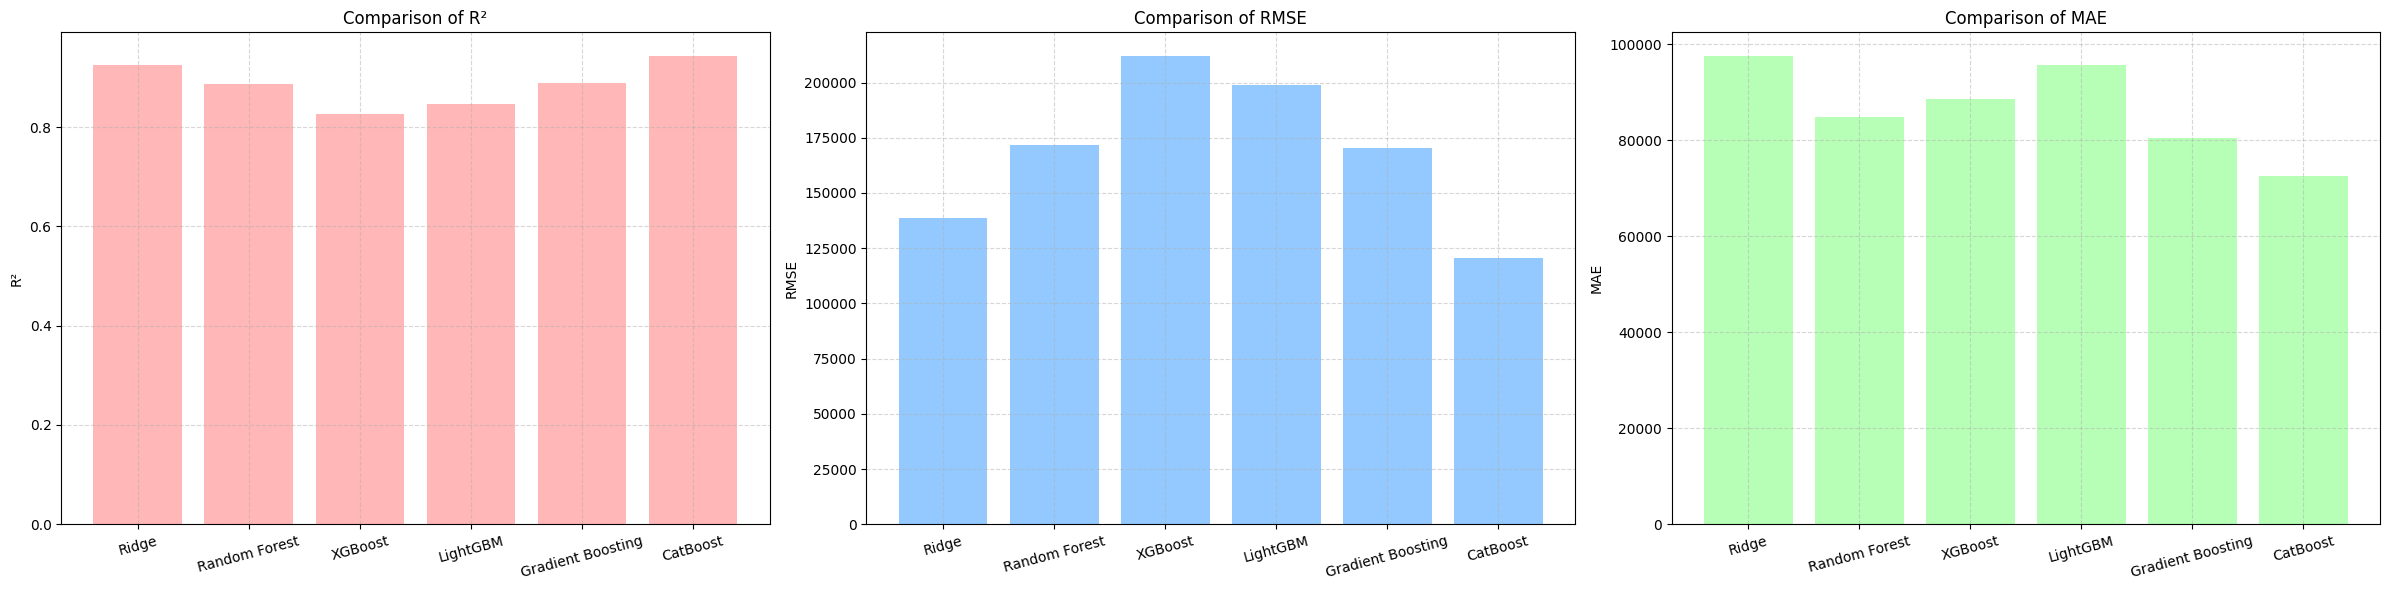

In [164]:
import matplotlib.pyplot as plt

# Données dynamiques des métriques
values = {
    'R²': [
        r2_lr_opt,        # Ridge
        r2_rf_random,     # Random Forest
        r2_optimized,     # XGBoost
        r2_lgbm_opt,      # LightGBM
        r2_gbm_opt,       # Gradient Boosting
        r2                # CatBoost
    ],
    'RMSE': [
        rmse_lr_opt,
        rmse_rf_random,
        rmse_optimized,
        rmse_lgbm_opt,
        rmse_gbm_opt,
        rmse
    ],
    'MAE': [
        mae_lr_opt,
        mae_rf_random,
        mae_optimized,
        mae_lgbm_opt,
        mae_gbm_opt,
        mae
    ]
}

# Noms des modèles
model_names = ['Ridge', 'Random Forest', 'XGBoost', 'LightGBM', 'Gradient Boosting', 'CatBoost']

# Création des sous-graphiques
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# Couleurs personnalisées
colors = ['#FF9999', '#66B2FF', '#99FF99']

# Boucle pour chaque métrique
for i, metric in enumerate(['R²', 'RMSE', 'MAE']):
    axes[i].bar(model_names, values[metric], color=colors[i], alpha=0.7)
    axes[i].set_ylabel(metric)
    axes[i].set_title(f'Comparison of {metric}')
    axes[i].set_xticklabels(model_names, rotation=15)
    axes[i].grid(True, linestyle='--', alpha=0.5)

# Ajustement final
plt.tight_layout()
plt.show()


#🔍 **Feature Importance**

📊 **Visualizing Feature Contributions with a Bar Plot**

<ipython-input-166-b3346a8c54ed>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='coolwarm')


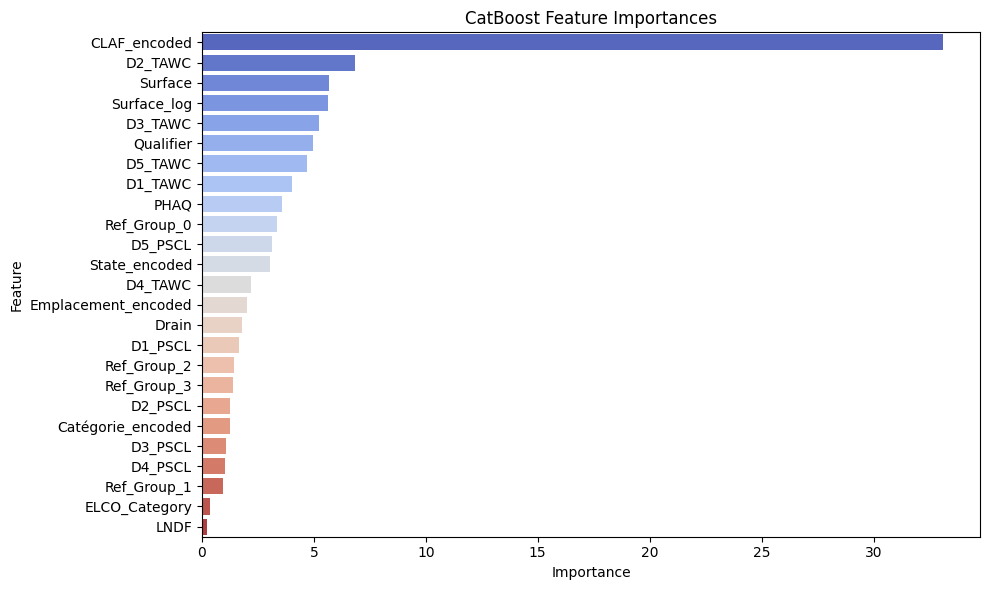

In [166]:
# 📌 Feature Importance
feature_importances = best_model.get_feature_importance()
feature_names = X_train.columns

# DataFrame des importances
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# 🌟 Affichage
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='coolwarm')
plt.title('CatBoost Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# 📊 **CatBoost – Test Results**

In [159]:
import pandas as pd

# 🔧 Affiche toutes les colonnes sans couper
pd.set_option('display.max_columns', None)

# 👀 Affiche les 5 premières lignes avec toutes les colonnes visibles
print(df.tail(8))


        Prix      Surface  LNDF  Drain  D1_PSCL  D2_PSCL  D3_PSCL  D4_PSCL  \
420   350000   356.951639     4      3        2        2        2        2   
421   980000   786.949554     4      4        4        4        4        4   
422   470000   812.254742     4      3        2        2        2        2   
423   368900   497.331130     4      3        2        2        2        2   
424  2900000  1295.118567     4      4        4        4        4        4   
425   930000   487.988818     4      4        4        4        4        4   
426   692500   507.874729     4      3        2        2        2        2   
427    58000   164.029642     7      3        2        2        2        2   

     D5_PSCL    D1_TAWC    D2_TAWC    D3_TAWC    D4_TAWC    D5_TAWC  Prix_log  \
420        2  10.272465  14.071351  12.799360  17.895830   7.732486  0.563334   
421        4  12.682150  11.161633  17.782885  18.832178  20.521165  0.832284   
422        2  13.812858  14.061900  15.078611  19.4184

In [174]:
from catboost import CatBoostRegressor

# Exemple d'entraînement
cat_model = CatBoostRegressor(verbose=0)
cat_model.fit(X_train, y_train)

# Ensuite, tu peux le sauvegarder correctement
import joblib
joblib.dump(cat_model, "catboost_model.pkl")


['catboost_model.pkl']

In [177]:
import pandas as pd
import joblib

# Charger le modèle CatBoost depuis le fichier .pkl
loaded_cat_model = joblib.load("catboost_model.pkl")

# Colonnes attendues
expected_columns = [
    'State_encoded', 'Catégorie_encoded', 'Emplacement_encoded', 'Surface', 'LNDF', 'CLAF_encoded', 'Drain',
    'D1_PSCL', 'D2_PSCL', 'D3_PSCL', 'D4_PSCL', 'D5_PSCL',
    'D1_TAWC', 'D2_TAWC', 'D3_TAWC', 'D4_TAWC', 'D5_TAWC',
    'Qualifier', 'Ref_Group_0', 'Ref_Group_1',
    'Ref_Group_2', 'Ref_Group_3', 'PHAQ', 'ELCO_Category', 'Surface_log'
]

# Donnée à prédire
new_data = pd.DataFrame([{
    'Surface': 809.678546,
    'Emplacement_encoded': 374091.194976,
    'State_encoded': 573161.556599,
    'LNDF': 6,
    'CLAF_encoded': 9.942798e+05,
    'Drain': 4,
    'D1_PSCL': 4,
    'D2_PSCL': 4,
    'D3_PSCL': 4,
    'D4_PSCL': 4,
    'D5_PSCL': 4,
    'D1_TAWC': 15.427912,
    'D2_TAWC': 14.196503,
    'D3_TAWC': 16.427454,
    'D4_TAWC': 15.692682,
    'D5_TAWC': 22.271477,
    'Catégorie_encoded': 394121.386982,
    'ELCO_Category': 4,
    'Qualifier': 1,
    'Ref_Group_0': 0,
    'Ref_Group_1': 0,
    'Ref_Group_2': 0,
    'Ref_Group_3': 1,
    'PHAQ': 9.293464,
    'Surface_log': 0.926803,
}])

# Réorganiser les colonnes
new_data = new_data[expected_columns]

prediction = loaded_cat_model.predict(new_data)
print("🧠 Prédiction du prix :", round(prediction[0], 2), "TND")


🧠 Prédiction du prix : 1064499.85 TND


In [178]:
import pandas as pd
import joblib

# Charger le modèle CatBoost depuis le fichier .pkl
loaded_cat_model = joblib.load("catboost_model.pkl")

# Colonnes attendues
expected_columns = [
    'State_encoded', 'Catégorie_encoded', 'Emplacement_encoded', 'Surface', 'LNDF', 'CLAF_encoded', 'Drain',
    'D1_PSCL', 'D2_PSCL', 'D3_PSCL', 'D4_PSCL', 'D5_PSCL',
    'D1_TAWC', 'D2_TAWC', 'D3_TAWC', 'D4_TAWC', 'D5_TAWC',
    'Qualifier', 'Ref_Group_0', 'Ref_Group_1',
    'Ref_Group_2', 'Ref_Group_3', 'PHAQ', 'ELCO_Category', 'Surface_log'
]

new_data = pd.DataFrame([{
    'Surface': 356.951639,
    'Emplacement_encoded':1.192093e+06,
    'State_encoded':7.935658e+05,  # Non utilisé dans le modèle, tu peux l’enlever si pas dans training
    'LNDF': 4,
    'CLAF_encoded':3.264189e+05,
    'Drain': 3,
    'D1_PSCL': 2,
    'D2_PSCL': 2,
    'D3_PSCL': 2,
    'D4_PSCL': 2,
    'D5_PSCL': 2,  # Assure-toi que cette colonne est présente
    'D1_TAWC':10.272465,
    'D2_TAWC':14.071351,
    'D3_TAWC':12.799360,
    'D4_TAWC':17.895830,
    'D5_TAWC':7.732486,  # Assure-toi que cette colonne existe
    'Catégorie_encoded': 396374.327391,  # Non utilisé dans le modèle
    'ELCO_Category':4,
    'Qualifier':3,
    'Ref_Group_0': 0,
    'Ref_Group_1': 0,
    'Ref_Group_2': 0,
    'Ref_Group_3': 1,
    'PHAQ': 8.294527,
    'Surface_log':0.623073,
}])
# Réorganiser les colonnes
new_data = new_data[expected_columns]

prediction = loaded_cat_model.predict(new_data)
print("🧠 Prédiction du prix :", round(prediction[0], 2), "TND")


🧠 Prédiction du prix : 329611.24 TND


# 🔍 **Real vs. Predicted with CatBoost**

In [161]:
import pandas as pd
import numpy as np

# Créer un DataFrame pour comparer les valeurs réelles et prédites
comparaison = pd.DataFrame({
    'Réel': y_test,
    'Prédiction': y_pred_cat
})

# Ajouter une colonne pour l’erreur absolue
comparaison['Erreur Absolue'] = np.abs(comparaison['Réel'] - comparaison['Prédiction'])

# Afficher les premières lignes
print(comparaison.head())


       Réel     Prédiction  Erreur Absolue
420  350000  354544.356661     4544.356661
75   135000  145246.688606    10246.688606
177  890000  759723.196957   130276.803043
30   300150  329386.298832    29236.298832
362   44000  117563.289168    73563.289168


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


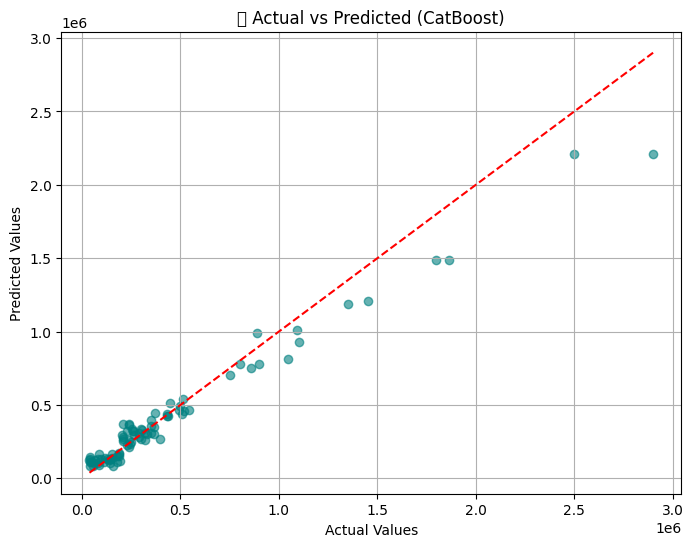

In [167]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('📊 Actual vs Predicted (CatBoost)')
plt.grid(True)
plt.show()


📊 Interpretation of the Actual vs Predicted Plot
This scatter plot compares the actual target values (x-axis) to the predicted values (y-axis) generated by the CatBoost model.

🔴 **The red dashed line** represents the ideal situation where predictions perfectly match actual values (Predicted = Actual).

🟢 **The closer the points are to the red line** , the better the model's predictions.

✅ Most points are **clustered closely around the red line**, which indicates that the CatBoost model is performing well.

⚠️ A few points are **far from the line**, showing some larger prediction errors — these might be outliers or complex cases.

==> The plot shows that **the CatBoost model captures the overall trend very accuratel**y, with only minor deviations. It's a **strong performer** for your regression task.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


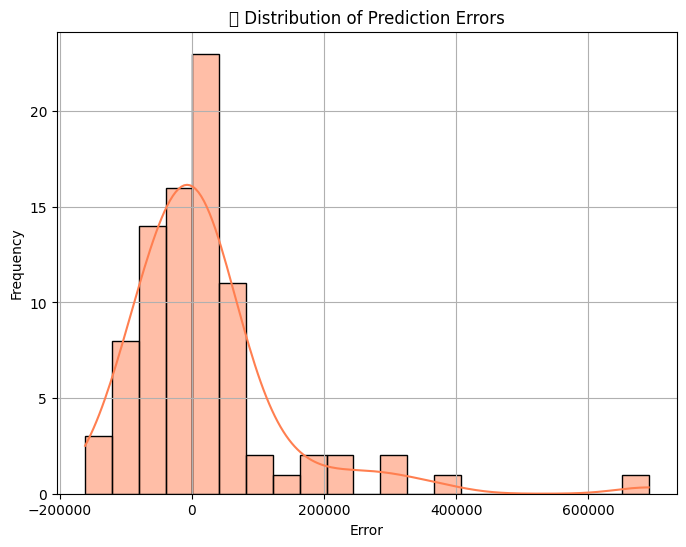

In [168]:
import seaborn as sns

errors = y_test - y_pred_best
plt.figure(figsize=(8, 6))
sns.histplot(errors, kde=True, color='coral')
plt.title('📉 Distribution of Prediction Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


This histogram visualizes **the distribution of the prediction errors **(i.e., the difference between actual and predicted values).

🧮 The **x-axis** shows the** error values** (Actual − Predicted), while the **y-axis** shows the **frequency** of these errors.

🟠 The orange curve represents a** kernel density estimate (KDE)**, helping visualize the overall shape of the error distribution.

🔍 **Observations:**
✅ Most errors are **clustered around zero**, which indicates that the model's predictions are **generally accurate**.

📉 The distribution is **slightly right-skewed**, meaning that while most errors are small, there are a few larger positive errors (i.e., underestimations).

⚠️ A few outliers exist on the right tail, indicating some **significant underpredictions**.

=> The **CatBoost model** performs well overall, with **most errors being small and centered near zero**, suggesting high accuracy and reliability. A few large errors may require further investigation.